In [1]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

fatal: destination path 'GroceryStoreDataset' already exists and is not an empty directory.


In [ ]:
"""import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}
        self.idx_to_class = {}

        current_label = 0

        # Traverse the root directory to get image paths and labels
        for parent_dir in sorted(os.listdir(root_dir)):
            parent_path = os.path.join(root_dir, parent_dir)
            if os.path.isdir(parent_path):
                for class_dir in sorted(os.listdir(parent_path)):
                    class_path = os.path.join(parent_path, class_dir)
                    if os.path.isdir(class_path):
                        if class_dir not in self.class_to_idx:
                            self.class_to_idx[class_dir] = current_label
                            self.idx_to_class[current_label] = class_dir
                            current_label += 1
                        label_idx = self.class_to_idx[class_dir]
                        for root, _, files in os.walk(class_path):
                            for file in files:
                                if file.endswith(('jpg', 'jpeg', 'png')):
                                    img_path = os.path.join(root, file)
                                    self.samples.append((img_path, label_idx))
                                    # Debugging print statement
                                    #print(f"Loaded {file} from {root} as class {class_dir} with index {label_idx}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label
    
    def load_samples(self) -> Tuple[List[Tuple[str, int]], dict, dict]:
        samples = []
        class_to_idx = {}
        idx_to_class = {}

        current_label = 0
        split_dir = self.root / self.split
        for parent_dir in sorted(os.listdir(split_dir)):
            parent_path = split_dir / parent_dir
            if parent_path.is_dir():
                for class_dir in sorted(os.listdir(parent_path)):
                    class_path = parent_path / class_dir
                    if class_path.is_dir():
                        if class_dir not in class_to_idx:
                            class_to_idx[class_dir] = current_label
                            idx_to_class[current_label] = class_dir
                            current_label += 1
                        label_idx = class_to_idx[class_dir]
                        for root, _, files in os.walk(class_path):
                            for file in files:
                                if file.endswith(('jpg', 'jpeg', 'png')):
                                    img_path = os.path.join(root, file)
                                    samples.append((img_path, label_idx))
        return samples, class_to_idx, idx_to_class

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}"""

"""data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]),
}"""



# Paths to dataset
"""path2train = "/kaggle/working/GroceryStoreDataset/dataset/train"
path2val = "/kaggle/working/GroceryStoreDataset/dataset/val"
path2test = "/kaggle/working/GroceryStoreDataset/dataset/test"

# Load the datasets
train_dataset = CustomImageDataset(root_dir=path2train, transform=data_transforms['train'])
val_dataset = CustomImageDataset(root_dir=path2val, transform=data_transforms['val'])
test_dataset = CustomImageDataset(root_dir=path2test, transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Function to get class distribution
def get_class_distribution(dataset):
    labels = dataset.labels
    class_count = Counter(labels)
    return class_count

# Function to plot class distribution
def plot_class_distribution(class_count, class_names):
    classes = list(class_count.keys())
    counts = list(class_count.values())
    class_labels = [class_names[i] for i in classes]
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, tick_label=class_labels)
    plt.xlabel('Class')
    plt.ylabel('Number of instances')
    plt.title('Class distribution in the dataset')
    plt.xticks(rotation=90)
    plt.show()

# Get and plot class distribution for the training dataset
#class_count = get_class_distribution(train_dataset)
#print("Class count:", class_count)
#plot_class_distribution(class_count, train_dataset.class_names)

# Verify the class names
#print("Class names:", train_dataset.class_names)"""

In [ ]:
"""# Get and plot class distribution
class_count = get_class_distribution(test_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count)

# Verify the class-to-index mapping
print("Class to index mapping:", test_dataset.class_to_idx)
print("Index to class mapping:", test_dataset.idx_to_class)"""


In [ ]:
"""# Get and plot class distribution
class_count = get_class_distribution(val_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count)

# Verify the class-to-index mapping
print("Class to index mapping:", val_dataset.class_to_idx)
print("Index to class mapping:", val_dataset.idx_to_class)
"""

In [2]:
from pathlib import Path
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from typing import List, Tuple
import numpy as np
from collections import Counter
import random

num_classes = 43

class GroceryStoreDataset(Dataset):
    def __init__(self, samples: List[Tuple[str, int]] = None, split: str = None, transform=None) -> None:
        super().__init__()
        self.root = Path("/kaggle/working/GroceryStoreDataset/dataset")
        self.transform = transform

        if samples is not None:
            self.samples = samples
            self.labels = [label for _, label in samples]
            self.paths = [path for path, _ in samples]
        else:
            self.split = split
            self.paths, self.labels = self.read_file()
        
        self.class_names = self.get_class_names()

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:
        img = Image.open(self.root / self.paths[idx]).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []
        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                path, _, label = line.strip().split(", ")
                paths.append(path)
                labels.append(int(label))
        return paths, labels

    def get_class_names(self) -> List[str]:
        class_names = {}
        with open(self.root / "train.txt") as f:
            for line in f:
                path, _, label = line.strip().split(", ")
                if int(label) not in class_names:
                    class_names[int(label)] = Path(path).parent.name
        return [class_names[i] for i in range(len(class_names))]

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

# Sample dataset loader
def sample_max_50(samples, dynamic_size=50):
    sampled_samples = []
    class_count = Counter([label for _, label in samples])
    class_samples = {k: [] for k in class_count.keys()}
    
    for img_path, label in samples:
        class_samples[label].append((img_path, label))
    
    for cls in class_samples.keys():
        sampled_samples.extend(random.sample(class_samples[cls], min(dynamic_size, class_count[cls])))
    
    return sampled_samples

def filter_samples(samples, target_classes):
    return [(img_path, label) for img_path, label in samples if label in target_classes]

# Classes with high and low number of instances (as an example)
#high_instance_classes = [0, 7, 13, 19, 20, 27, 38, 39, 41]
#low_instance_classes = [10, 15, 24, 28, 30, 34, 40]
high_instance_classes = [0, 19, 20, 27, 7, 41, 13, 38, 39]
low_instance_classes = [24, 42, 11, 33, 14, 16, 34, 36, 15, 29, 10, 31, 35, 40, 28]

# Paths to dataset splits
path2train = "/kaggle/working/GroceryStoreDataset/dataset/train"
path2val = "/kaggle/working/GroceryStoreDataset/dataset/val"
path2test = "/kaggle/working/GroceryStoreDataset/dataset/test"

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}


# Load the datasets
train_dataset_full = GroceryStoreDataset(split='train', transform=data_transforms['train'])
val_dataset_full = GroceryStoreDataset(split='val', transform=data_transforms['val'])
test_dataset_full = GroceryStoreDataset(split='test', transform=data_transforms['test'])

# Prepare samples
train_samples = list(zip(train_dataset_full.paths, train_dataset_full.labels))
val_samples = list(zip(val_dataset_full.paths, val_dataset_full.labels))

train_samples_50 = sample_max_50(train_samples, 36)
train_samples_high = filter_samples(train_samples, high_instance_classes)
train_samples_low = filter_samples(train_samples, low_instance_classes)

# Create datasets using the filtered samples
train_dataset_50 = GroceryStoreDataset(samples=train_samples_50, transform=data_transforms['train'])
train_dataset_high = GroceryStoreDataset(samples=train_samples_high, transform=data_transforms['train'])
train_dataset_low = GroceryStoreDataset(samples=train_samples_low, transform=data_transforms['train'])

# Create DataLoaders
train_loader_50 = DataLoader(train_dataset_50, batch_size=32, shuffle=True, num_workers=4)
train_loader_high = DataLoader(train_dataset_high, batch_size=32, shuffle=True, num_workers=4)
train_loader_low = DataLoader(train_dataset_low, batch_size=32, shuffle=True, num_workers=4)

# Prepare validation samples
val_samples_50 = sample_max_50(val_samples)
val_samples_high = filter_samples(val_samples, high_instance_classes)
val_samples_low = filter_samples(val_samples, low_instance_classes)

# Create validation datasets using the filtered samples
val_dataset_50 = GroceryStoreDataset(samples=val_samples_50, transform=data_transforms['val'])
val_dataset_high = GroceryStoreDataset(samples=val_samples_high, transform=data_transforms['val'])
val_dataset_low = GroceryStoreDataset(samples=val_samples_low, transform=data_transforms['val'])

# Create validation DataLoaders
val_loader_50 = DataLoader(val_dataset_50, batch_size=32, shuffle=False, num_workers=4)
val_loader_high = DataLoader(val_dataset_high, batch_size=32, shuffle=False, num_workers=4)
val_loader_low = DataLoader(val_dataset_low, batch_size=32, shuffle=False, num_workers=4)

# Now can proceed with training and evaluation as before
train_dataset = GroceryStoreDataset(split='train', transform=data_transforms['train'])
val_dataset = GroceryStoreDataset(split='val', transform=data_transforms['val'])
test_dataset = GroceryStoreDataset(split='test', transform=data_transforms['test'])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)


In [3]:
alternative_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}
train_samples_70 = sample_max_50(train_samples, 70)
train_dataset_70 = GroceryStoreDataset(samples=train_samples_70, transform=alternative_data_transforms['train'])
train_loader_70 = DataLoader(train_dataset_70, batch_size=32, shuffle=True, num_workers=4)
val_samples_70 = sample_max_50(val_samples)
val_dataset_70 = GroceryStoreDataset(samples=val_samples_70, transform=alternative_data_transforms['val'])
val_loader_70 = DataLoader(val_dataset_70, batch_size=32, shuffle=False, num_workers=4)

In [ ]:
"""from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from typing import List, Tuple
import numpy as np

class GroceryStoreDataset(Dataset):
    def __init__(self, split: str, transform=None) -> None:
        super().__init__()
        self.root = Path("GroceryStoreDataset/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()
        self.transform = transform
        self.class_names = self.get_class_names()

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:
        img = Image.open(self.root / self.paths[idx]).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []
        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                path, _, label = line.strip().split(", ")
                paths.append(path)
                labels.append(int(label))
        return paths, labels

    def get_class_names(self) -> List[str]:
        class_names = {}
        with open(self.root / "train.txt") as f:
            for line in f:
                path, _, label = line.strip().split(", ")
                if int(label) not in class_names:
                    class_names[int(label)] = Path(path).parent.name
        return [class_names[i] for i in range(len(class_names))]

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

# Paths to dataset splits
path2train = "GroceryStoreDataset/dataset/train"
path2val = "GroceryStoreDataset/dataset/val"
path2test = "GroceryStoreDataset/dataset/test"

#GroceryStoreDataset
# Load the datasets
train_dataset = GroceryStoreDataset(split='train', transform=data_transforms['train'])
val_dataset = GroceryStoreDataset(split='val', transform=data_transforms['val'])
test_dataset = GroceryStoreDataset(split='test', transform=data_transforms['test'])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)
"""

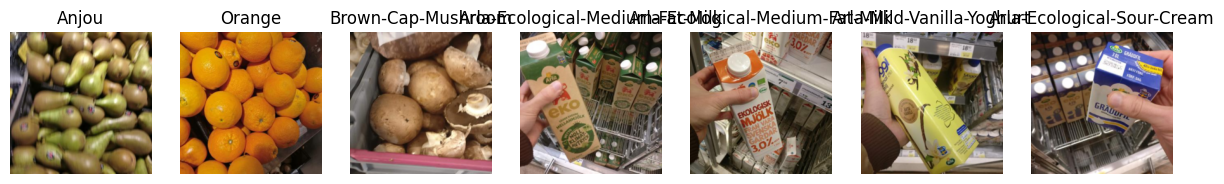

In [4]:
# Function to get class distribution
def get_class_distribution(dataset):
    labels = dataset.labels
    class_count = Counter(labels)
    return class_count

# Function to plot class distribution
def plot_class_distribution(class_count, class_names):
    classes = list(class_count.keys())
    counts = list(class_count.values())
    class_labels = [class_names[i] for i in classes]
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, tick_label=class_labels)
    plt.xlabel('Class')
    plt.ylabel('Number of instances')
    plt.title('Class distribution in the dataset')
    plt.xticks(rotation=90)
    plt.show()


# Function to visualize samples from a dataset
def visualize_dataset(dataset, class_names, num_images=7):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        image = image.numpy().transpose((1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
    plt.show()

# Visualize some samples from the validation dataset
visualize_dataset(val_dataset, train_dataset.class_names)

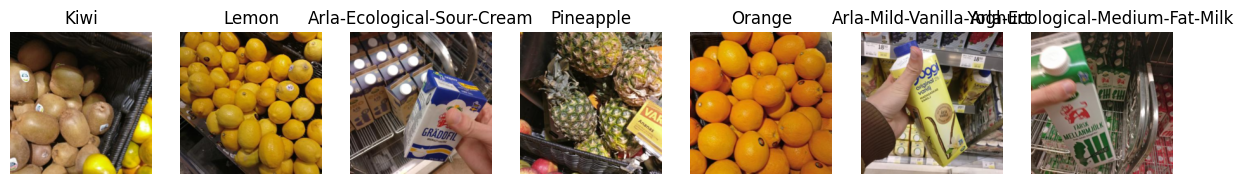

In [5]:
visualize_dataset(val_dataset, train_dataset.class_names)

In [ ]:
class_count = get_class_distribution(train_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count, train_dataset.class_names)

# Verify the class names
print("Class names:", train_dataset.class_names)

#class_count = get_class_distribution(test_dataset)
#print("Class count:", class_count)
#plot_class_distribution(class_count)

# Verify the class-to-index mapping
#print("Class to index mapping:", test_dataset.class_to_idx)
#print("Index to class mapping:", test_dataset.idx_to_class)

Class count: Counter({0: 276, 19: 219, 27: 172, 20: 164, 7: 153, 38: 110, 13: 108, 41: 100, 39: 70, 18: 68, 26: 58, 9: 56, 25: 47, 3: 45, 2: 44, 31: 42, 4: 41, 23: 41, 1: 40, 36: 39, 37: 37, 12: 36, 8: 35, 17: 34, 6: 31, 22: 31, 5: 30, 21: 30, 42: 29, 11: 27, 32: 27, 14: 25, 16: 25, 33: 25, 15: 22, 29: 22, 10: 21, 35: 21, 24: 19, 30: 19, 40: 17, 34: 15, 28: 14})


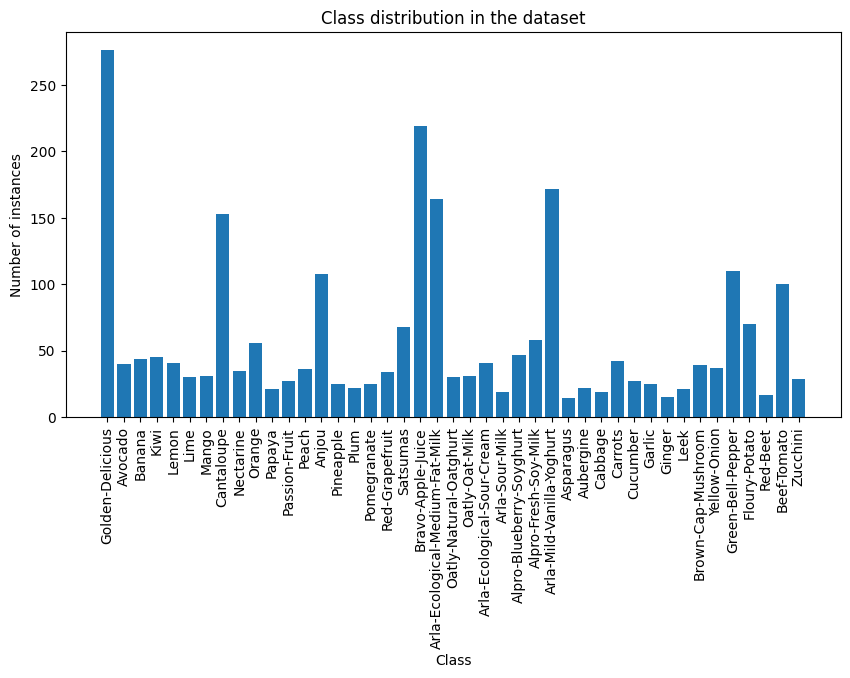

In [6]:
class_count = get_class_distribution(test_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count, test_dataset.class_names)

# Verify the class names
#print("Class names:", test_dataset.class_names)

Class count: Counter({19: 29, 20: 26, 0: 22, 7: 20, 27: 20, 38: 15, 25: 10, 39: 10, 41: 8, 2: 6, 1: 5, 3: 5, 4: 5, 5: 5, 9: 5, 11: 5, 12: 5, 13: 5, 14: 5, 16: 5, 17: 5, 18: 5, 22: 5, 21: 5, 23: 5, 28: 5, 36: 5, 30: 5, 31: 5, 32: 5, 37: 5, 40: 5, 42: 5, 29: 4, 34: 4, 35: 4, 6: 3})


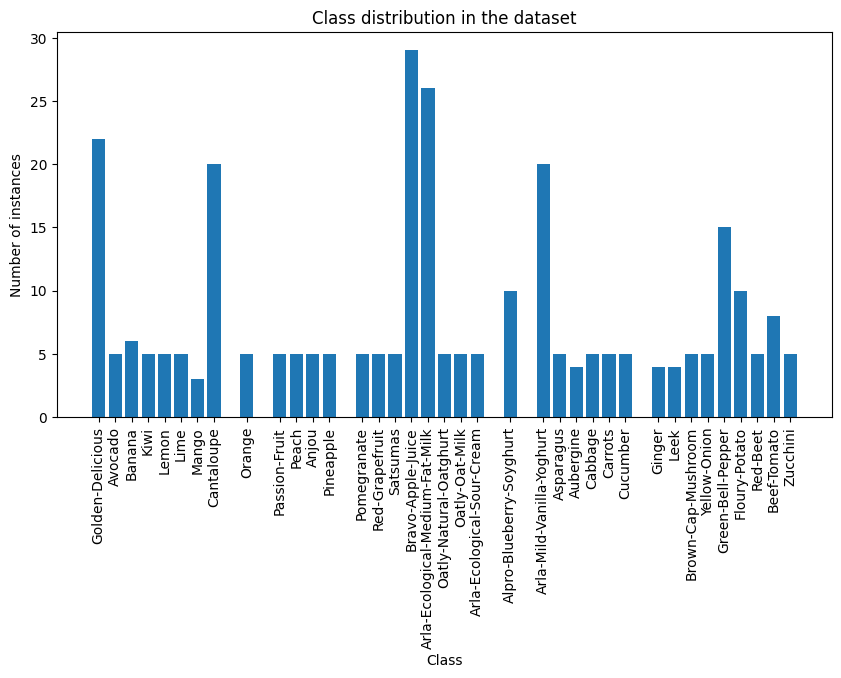

Class names: ['Golden-Delicious', 'Avocado', 'Banana', 'Kiwi', 'Lemon', 'Lime', 'Mango', 'Cantaloupe', 'Nectarine', 'Orange', 'Papaya', 'Passion-Fruit', 'Peach', 'Anjou', 'Pineapple', 'Plum', 'Pomegranate', 'Red-Grapefruit', 'Satsumas', 'Bravo-Apple-Juice', 'Arla-Ecological-Medium-Fat-Milk', 'Oatly-Natural-Oatghurt', 'Oatly-Oat-Milk', 'Arla-Ecological-Sour-Cream', 'Arla-Sour-Milk', 'Alpro-Blueberry-Soyghurt', 'Alpro-Fresh-Soy-Milk', 'Arla-Mild-Vanilla-Yoghurt', 'Asparagus', 'Aubergine', 'Cabbage', 'Carrots', 'Cucumber', 'Garlic', 'Ginger', 'Leek', 'Brown-Cap-Mushroom', 'Yellow-Onion', 'Green-Bell-Pepper', 'Floury-Potato', 'Red-Beet', 'Beef-Tomato', 'Zucchini']


In [7]:
class_count = get_class_distribution(val_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count, val_dataset.class_names)

# Verify the class names
print("Class names:", val_dataset.class_names)

In [8]:
#import
#imports
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from itertools import cycle
import optuna
import optuna
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, Sampler
from PIL import Image
import os
import torch
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import nn, optim
from torchvision import models
from torch.utils.data import Sampler
import random

In [9]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.model = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.model = model
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.model = model
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
    def getmodel(self):
        return self.model

import itertools
import torch
import torch.nn as nn
import torch.optim as optim

# Define values
dropout_rates = [0.8]
learning_rates = [0.001]
optimizers = ['Adam']
weight_decays = [0, 0.001]
momentums = [0.9, 0.99]
criteria = ['CrossEntropyLoss']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the CNN architecture with configurable dropout
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=43, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def initialize_model(dropout_rate, lr, optimizer_name, weight_decay, momentum, criterion_name):
    model = SimpleCNN(num_classes=43, dropout_rate=dropout_rate).to(device)

    if criterion_name == 'CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
    else:
        raise ValueError("Unsupported criterion")

    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError("Unsupported optimizer")

    return model, criterion, optimizer

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    acc = correct / total
    print(f'Test Accuracy: {acc:.4f}')

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=15, patience=5):
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []

    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], '
                      f'Train Loss: {running_loss/((batch_idx+1)*train_loader.batch_size):.4f}, '
                      f'Train Acc: {correct/total:.4f}')

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_loss.append(val_epoch_loss)
        val_acc.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model = early_stopping.getmodel()
            break

    return model, train_loss, val_loss, train_acc, val_acc

model = ''

# Experiment with different hyperparameters
for dropout_rate, lr, optimizer_name, criterion_name in itertools.product(dropout_rates, learning_rates, optimizers, criteria):
    if optimizer_name == 'Adam':
        weight_decay = 0.0001
        print(f'Training with dropout_rate={dropout_rate}, lr={lr}, optimizer={optimizer_name}, weight_decay={weight_decay}, momentum=not applicable, criterion={criterion_name}')
        model, criterion, optimizer = initialize_model(dropout_rate, lr, optimizer_name, weight_decay, None, criterion_name)
        model, train_loss, val_loss, train_acc, val_acc = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50, patience=50)
        # Save results for further analysis if needed
        evaluate_model(model, test_loader)


Training with dropout_rate=0.8, lr=0.001, optimizer=Adam, weight_decay=0.0001, momentum=not applicable, criterion=CrossEntropyLoss
Epoch [1/50], Batch [0/165], Train Loss: 3.7481, Train Acc: 0.0625
Epoch [1/50], Batch [10/165], Train Loss: 3.7719, Train Acc: 0.0682
Epoch [1/50], Batch [20/165], Train Loss: 3.6651, Train Acc: 0.0923
Epoch [1/50], Batch [30/165], Train Loss: 3.6126, Train Acc: 0.1028
Epoch [1/50], Batch [40/165], Train Loss: 3.5719, Train Acc: 0.0976
Epoch [1/50], Batch [50/165], Train Loss: 3.5727, Train Acc: 0.0944
Epoch [1/50], Batch [60/165], Train Loss: 3.5607, Train Acc: 0.1076
Epoch [1/50], Batch [70/165], Train Loss: 3.5589, Train Acc: 0.1021
Epoch [1/50], Batch [80/165], Train Loss: 3.5404, Train Acc: 0.1034
Epoch [1/50], Batch [90/165], Train Loss: 3.5373, Train Acc: 0.1058
Epoch [1/50], Batch [100/165], Train Loss: 3.5064, Train Acc: 0.1139
Epoch [1/50], Batch [110/165], Train Loss: 3.4871, Train Acc: 0.1177
Epoch [1/50], Batch [120/165], Train Loss: 3.4783, T

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations
"""data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]),
}"""

# Load the datasets
#train_dataset = datasets.ImageFolder(root=path2train, transform=data_transforms['train'])
#val_dataset = datasets.ImageFolder(root=path2val, transform=data_transforms['val'])
#test_dataset = datasets.ImageFolder(root=path2test, transform=data_transforms['val'])

#train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
#val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)
#test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Define the model
def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Training function
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# List of different step_size and gamma values
#step_sizes = [5, 7, 10]
#gammas = [0.1, 0.5, 0.9]
step_sizes = [5]
gammas = [0.5]



# Store the results
results = []


Training with step_size=5 and gamma=0.5


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s] 


Epoch [1/25] Train Loss: 2.2737, Train Acc: 0.3773, Val Loss: 2.0962, Val Acc: 0.4797
Epoch [2/25] Train Loss: 1.2756, Train Acc: 0.6159, Val Loss: 2.2537, Val Acc: 0.4628
Epoch [3/25] Train Loss: 0.9569, Train Acc: 0.7117, Val Loss: 2.2627, Val Acc: 0.4392
Epoch [4/25] Train Loss: 0.7440, Train Acc: 0.7617, Val Loss: 1.9669, Val Acc: 0.5338
Epoch [5/25] Train Loss: 0.5873, Train Acc: 0.8178, Val Loss: 1.8979, Val Acc: 0.5169
Epoch [6/25] Train Loss: 0.3185, Train Acc: 0.9072, Val Loss: 1.3975, Val Acc: 0.6216
Epoch [7/25] Train Loss: 0.2083, Train Acc: 0.9383, Val Loss: 1.8043, Val Acc: 0.5642
Epoch [8/25] Train Loss: 0.1600, Train Acc: 0.9538, Val Loss: 1.4603, Val Acc: 0.5912
Epoch [9/25] Train Loss: 0.1135, Train Acc: 0.9655, Val Loss: 1.4877, Val Acc: 0.5912
Epoch [10/25] Train Loss: 0.1155, Train Acc: 0.9655, Val Loss: 1.8400, Val Acc: 0.6149
Epoch [11/25] Train Loss: 0.0697, Train Acc: 0.9852, Val Loss: 1.3068, Val Acc: 0.6622
Epoch [12/25] Train Loss: 0.0433, Train Acc: 0.9894,

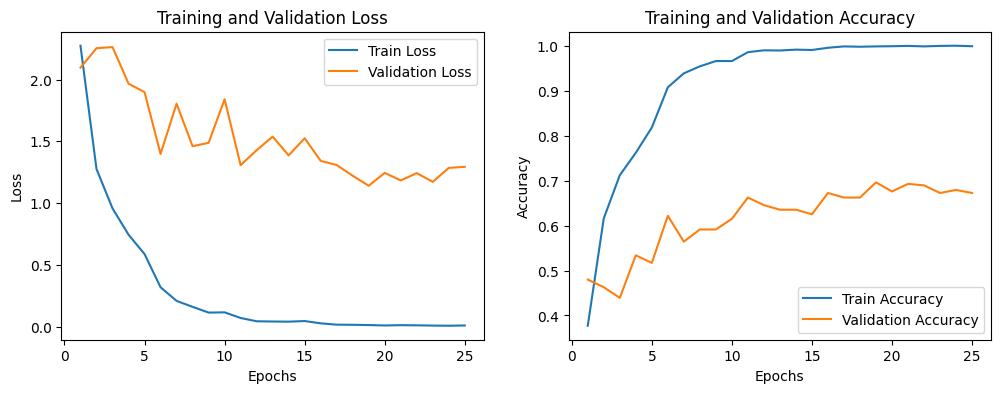

Epoch [1/25] Train Loss: 2.2679, Train Acc: 0.3936, Val Loss: 2.3710, Val Acc: 0.4122
Epoch [2/25] Train Loss: 1.3024, Train Acc: 0.6197, Val Loss: 2.6544, Val Acc: 0.4392
Epoch [3/25] Train Loss: 1.0008, Train Acc: 0.6989, Val Loss: 2.0897, Val Acc: 0.4730
Epoch [4/25] Train Loss: 0.7577, Train Acc: 0.7636, Val Loss: 1.5556, Val Acc: 0.5541
Epoch [5/25] Train Loss: 0.5644, Train Acc: 0.8269, Val Loss: 2.3580, Val Acc: 0.5135
Epoch [6/25] Train Loss: 0.3031, Train Acc: 0.9114, Val Loss: 1.3419, Val Acc: 0.6216
Epoch [7/25] Train Loss: 0.1784, Train Acc: 0.9523, Val Loss: 1.3384, Val Acc: 0.6689
Epoch [8/25] Train Loss: 0.1675, Train Acc: 0.9485, Val Loss: 1.4022, Val Acc: 0.6318
Epoch [9/25] Train Loss: 0.1525, Train Acc: 0.9587, Val Loss: 1.4810, Val Acc: 0.6419
Epoch [10/25] Train Loss: 0.1327, Train Acc: 0.9625, Val Loss: 1.2425, Val Acc: 0.6892
Epoch [11/25] Train Loss: 0.0797, Train Acc: 0.9811, Val Loss: 1.3232, Val Acc: 0.6588
Epoch [12/25] Train Loss: 0.0594, Train Acc: 0.9833,

In [11]:

for step_size in step_sizes:
    for gamma in gammas:
        print(f"Training with step_size={step_size} and gamma={gamma}")
        model = create_model()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

        model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
        )

        results.append({
            'step_size': step_size,
            'gamma': gamma,
            'val_acc': max(val_accuracies),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

# Find the best result
best_result = max(results, key=lambda x: x['val_acc'])
print(f"Best step_size: {best_result['step_size']}, Best gamma: {best_result['gamma']}, Validation Accuracy: {best_result['val_acc']}")

# Plot the results of the best model
def plot_training(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training(best_result['train_losses'], best_result['val_losses'], best_result['train_accuracies'], best_result['val_accuracies'])

# Evaluate the best model on test data
best_model = create_model()
optimizer = optim.Adam(best_model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=best_result['step_size'], gamma=best_result['gamma'])

best_model, _, _, _, _ = train_model(
    best_model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
)

evaluate_model(best_model, test_loader)


In [12]:
from collections import defaultdict

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    misclassifications = defaultdict(list)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Collect misclassified examples
            for label, prediction in zip(labels, predicted):
                if label != prediction:
                    misclassifications[label.item()].append(prediction.item())

    acc = correct / total
    print(f'Test Accuracy: {acc:.4f}')

    # Print misclassification details
    for label, predictions in misclassifications.items():
        print(f'{len(predictions)} data from class number {label} wrongly labeled as {predictions}')

In [13]:
evaluate_model(best_model, test_loader)

Test Accuracy: 0.7948
20 data from class number 0 wrongly labeled as [13, 13, 13, 13, 13, 13, 13, 3, 3, 17, 7, 7, 7, 7, 7, 5, 7, 5, 42, 41]
7 data from class number 1 wrongly labeled as [11, 3, 11, 11, 11, 11, 11]
6 data from class number 2 wrongly labeled as [31, 31, 42, 31, 31, 31]
33 data from class number 3 wrongly labeled as [13, 11, 11, 13, 4, 11, 11, 13, 13, 13, 13, 11, 4, 0, 4, 13, 13, 11, 13, 11, 11, 11, 4, 14, 35, 13, 11, 11, 13, 1, 11, 11, 39]
30 data from class number 4 wrongly labeled as [9, 18, 0, 7, 9, 17, 17, 17, 18, 5, 17, 9, 0, 17, 38, 17, 9, 9, 9, 9, 9, 17, 9, 17, 9, 0, 17, 9, 17, 17]
26 data from class number 5 wrongly labeled as [11, 6, 0, 0, 8, 0, 11, 0, 8, 38, 6, 0, 6, 17, 0, 0, 0, 6, 6, 6, 11, 0, 17, 6, 6, 4]
23 data from class number 6 wrongly labeled as [0, 38, 0, 8, 0, 10, 5, 11, 10, 1, 0, 13, 7, 9, 0, 1, 13, 10, 28, 13, 38, 4, 10]
38 data from class number 7 wrongly labeled as [3, 1, 1, 39, 1, 1, 1, 13, 40, 3, 3, 17, 9, 17, 1, 10, 17, 10, 4, 4, 4, 4, 10, 10,

Epoch [1/50] Train Loss: 2.3543, Train Acc: 0.3610, Val Loss: 2.3991, Val Acc: 0.3311
Epoch [2/50] Train Loss: 1.5085, Train Acc: 0.5553, Val Loss: 2.5235, Val Acc: 0.4392
Epoch [3/50] Train Loss: 1.1117, Train Acc: 0.6640, Val Loss: 1.7307, Val Acc: 0.5372
Epoch [4/50] Train Loss: 0.8489, Train Acc: 0.7458, Val Loss: 1.7745, Val Acc: 0.5473
Epoch [5/50] Train Loss: 0.6415, Train Acc: 0.8011, Val Loss: 2.3641, Val Acc: 0.4932
Epoch [6/50] Train Loss: 0.5628, Train Acc: 0.8163, Val Loss: 2.0339, Val Acc: 0.4662
Epoch [7/50] Train Loss: 0.4609, Train Acc: 0.8610, Val Loss: 2.2298, Val Acc: 0.4865
Epoch [8/50] Train Loss: 0.4218, Train Acc: 0.8667, Val Loss: 2.7126, Val Acc: 0.4459
Epoch [9/50] Train Loss: 0.3484, Train Acc: 0.8902, Val Loss: 2.1738, Val Acc: 0.5439
Epoch [10/50] Train Loss: 0.3008, Train Acc: 0.9083, Val Loss: 2.1696, Val Acc: 0.5676
Epoch [11/50] Train Loss: 0.1242, Train Acc: 0.9633, Val Loss: 1.6567, Val Acc: 0.6182
Epoch [12/50] Train Loss: 0.0760, Train Acc: 0.9795,

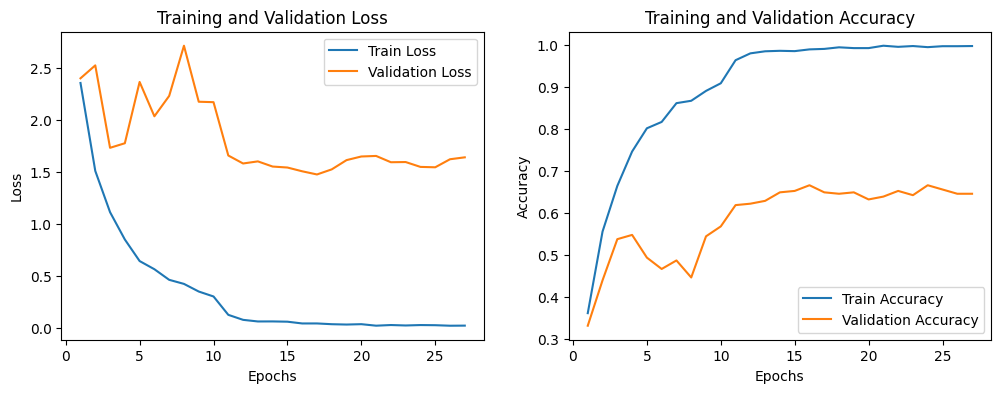

In [14]:
model = create_model()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=50, patience=10
        )

evaluate_model(model, test_loader)
# Find the best result

#model, train_losses, val_losses, train_accuracies, val_accuracies
evaluate_model(model, test_loader)

print(f"Best step_size: 10, Best gamma: 0.1, Validation Accuracy: {max(val_accuracies)}")

plot_training(train_losses, val_losses, train_accuracies, val_accuracies)


In [15]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}


In [ ]:
def get_class_distribution(dataset):
    labels = [label for _, label in dataset.samples]
    class_count = Counter(labels)
    return class_count

# Check the class distribution
class_count = get_class_distribution(train_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count)


In [16]:
def create_model(freeze_base=True):
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes

    if freeze_base:
        for param in model.parameters():
            param.requires_grad = False

        for param in model.fc.parameters():
            param.requires_grad = True

    return model.to(device)

# Unfreeze the base layers after initial epochs
def unfreeze_model(model):
    for param in model.parameters():
        param.requires_grad = True


In [17]:
optimizer = optim.Adam(best_model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [18]:
from torch.utils.data import Sampler
import random

class BalancedBatchSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size
        self.labels = [label for _, label in dataset.samples]
        self.label_to_indices = {label: [] for label in set(self.labels)}
        for idx, label in enumerate(self.labels):
            self.label_to_indices[label].append(idx)
        self.batches = self.create_batches()

    def create_batches(self):
        batches = []
        if len(self.label_to_indices) == 0:
            return batches

        min_class_size = min(len(indices) for indices in self.label_to_indices.values())
        class_count = len(self.label_to_indices)

        if class_count == 0:
            raise ValueError("No classes found in dataset.")

        samples_per_class = max(1, self.batch_size // class_count)
        if samples_per_class == 0:
            raise ValueError("Batch size too small compared to the number of classes.")

        for i in range(min_class_size // samples_per_class):
            batch = []
            for label, indices in self.label_to_indices.items():
                batch.extend(indices[i * samples_per_class:(i + 1) * samples_per_class])
            random.shuffle(batch)
            batches.append(batch)

        # Handle remaining samples if any
        remaining_samples = []
        for label, indices in self.label_to_indices.items():
            remaining_samples.extend(indices[(min_class_size // samples_per_class) * samples_per_class:])
        if remaining_samples:
            random.shuffle(remaining_samples)
            for i in range(0, len(remaining_samples), self.batch_size):
                batches.append(remaining_samples[i:i + self.batch_size])

        return batches

    def __iter__(self):
        random.shuffle(self.batches)
        for batch in self.batches:
            yield batch

    def __len__(self):
        return len(self.batches)

batch_size = 16  # can adjust this as needed
balanced_sampler = BalancedBatchSampler(train_dataset, batch_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=balanced_sampler, num_workers=4)


def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if epoch == 5:
            print("Unfreezing the base layers")
            unfreeze_model(model)
            optimizer = optim.Adam(model.parameters(), lr=0.0001)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies


AttributeError: 'GroceryStoreDataset' object has no attribute 'samples'

Training with step_size=5 and gamma=0.5
Epoch [1/25] Train Loss: 2.1837, Train Acc: 0.4110, Val Loss: 2.6386, Val Acc: 0.3581
Epoch [2/25] Train Loss: 1.3390, Train Acc: 0.6049, Val Loss: 2.3981, Val Acc: 0.4426
Epoch [3/25] Train Loss: 0.9301, Train Acc: 0.7144, Val Loss: 1.7735, Val Acc: 0.5270
Epoch [4/25] Train Loss: 0.8340, Train Acc: 0.7519, Val Loss: 1.9126, Val Acc: 0.5811
Epoch [5/25] Train Loss: 0.5838, Train Acc: 0.8212, Val Loss: 1.6575, Val Acc: 0.5541
Epoch [6/25] Train Loss: 0.2889, Train Acc: 0.9117, Val Loss: 1.4166, Val Acc: 0.6182
Unfreezing the base layers


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [7/25] Train Loss: 0.1388, Train Acc: 0.9625, Val Loss: 1.2036, Val Acc: 0.6486
Epoch [8/25] Train Loss: 0.1001, Train Acc: 0.9750, Val Loss: 1.1205, Val Acc: 0.6757
Epoch [9/25] Train Loss: 0.0947, Train Acc: 0.9739, Val Loss: 1.1599, Val Acc: 0.6858
Epoch [10/25] Train Loss: 0.0817, Train Acc: 0.9761, Val Loss: 1.2818, Val Acc: 0.6655
Epoch [11/25] Train Loss: 0.0683, Train Acc: 0.9807, Val Loss: 1.1524, Val Acc: 0.7128
Epoch [12/25] Train Loss: 0.0584, Train Acc: 0.9833, Val Loss: 1.1303, Val Acc: 0.6892
Epoch [13/25] Train Loss: 0.0414, Train Acc: 0.9928, Val Loss: 1.1419, Val Acc: 0.7061
Epoch [14/25] Train Loss: 0.0349, Train Acc: 0.9917, Val Loss: 1.0772, Val Acc: 0.7095
Epoch [15/25] Train Loss: 0.0327, Train Acc: 0.9939, Val Loss: 1.0582, Val Acc: 0.7128
Epoch [16/25] Train Loss: 0.0293, Train Acc: 0.9951, Val Loss: 1.1676, Val Acc: 0.6993
Epoch [17/25] Train Loss: 0.0289, Train Acc: 0.9958, Val Loss: 1.0934, Val Acc: 0.7162
Epoch [18/25] Train Loss: 0.0286, Train Acc: 0

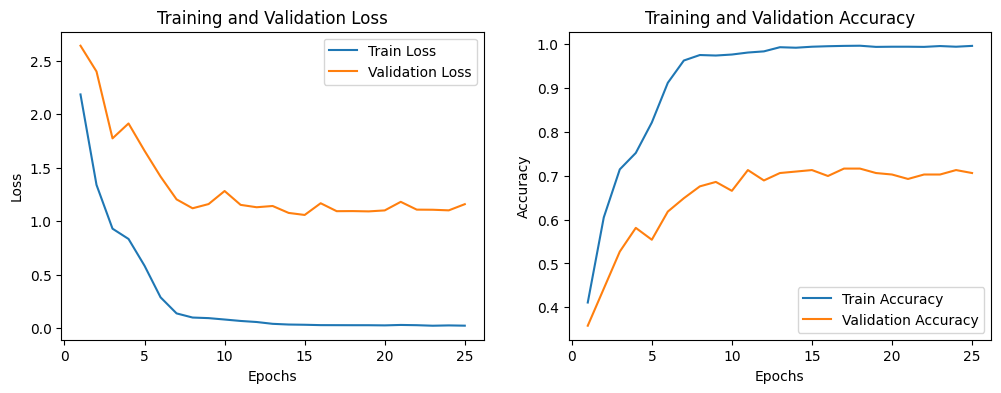

Epoch [1/25] Train Loss: 2.2074, Train Acc: 0.4008, Val Loss: 2.2801, Val Acc: 0.3885
Epoch [2/25] Train Loss: 1.3235, Train Acc: 0.6087, Val Loss: 1.9281, Val Acc: 0.4797
Epoch [3/25] Train Loss: 0.9687, Train Acc: 0.6955, Val Loss: 1.7087, Val Acc: 0.5270
Epoch [4/25] Train Loss: 0.7275, Train Acc: 0.7864, Val Loss: 1.7872, Val Acc: 0.5709
Epoch [5/25] Train Loss: 0.5875, Train Acc: 0.8197, Val Loss: 1.8284, Val Acc: 0.5135
Epoch [6/25] Train Loss: 0.2953, Train Acc: 0.9098, Val Loss: 1.2808, Val Acc: 0.6182
Unfreezing the base layers
Epoch [7/25] Train Loss: 0.1414, Train Acc: 0.9595, Val Loss: 1.2427, Val Acc: 0.6655
Epoch [8/25] Train Loss: 0.1098, Train Acc: 0.9720, Val Loss: 1.1472, Val Acc: 0.6926
Epoch [9/25] Train Loss: 0.0804, Train Acc: 0.9784, Val Loss: 1.1905, Val Acc: 0.6757
Epoch [10/25] Train Loss: 0.0614, Train Acc: 0.9852, Val Loss: 1.1230, Val Acc: 0.6926
Epoch [11/25] Train Loss: 0.0584, Train Acc: 0.9826, Val Loss: 1.2060, Val Acc: 0.6723
Epoch [12/25] Train Loss:

NameError: name 'CustomDataset' is not defined

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

criterion = nn.CrossEntropyLoss()

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if epoch == 5:
            print("Unfreezing the base layers")
            unfreeze_model(model)
            optimizer = optim.Adam(model.parameters(), lr=0.0001)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

#step_sizes = [5, 7, 10]
#gammas = [0.1, 0.5, 0.9]
step_size = 5
gamma = 0.5
results = []

print(f"Training with step_size={step_size} and gamma={gamma}")
model = create_model()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
        )

results.append({
            'step_size': step_size,
            'gamma': gamma,
            'val_acc': max(val_accuracies),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
})

best_result = max(results, key=lambda x: x['val_acc'])
print(f"Best step_size: {best_result['step_size']}, Best gamma: {best_result['gamma']}, Validation Accuracy: {best_result['val_acc']}")

def plot_training(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training(best_result['train_losses'], best_result['val_losses'], best_result['train_accuracies'], best_result['val_accuracies'])

best_model = create_model()
optimizer = optim.Adam(best_model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=best_result['step_size'], gamma=best_result['gamma'])

best_model, _, _, _, _ = train_model(
    best_model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
)

# Define the test_loader for evaluating the best model
test_loader = DataLoader(CustomDataset(root_dir=path2test, transform=data_transforms['val']), batch_size=batch_size, shuffle=False, num_workers=4)

def evaluate_model(model, test_loader):
    model.eval()
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()

    test_accuracy = test_correct / test_total
    print(f'Test Accuracy: {test_accuracy:.4f}')

evaluate_model(best_model, test_loader)

In [ ]:
from torch.utils.data import Dataset, DataLoader, Sampler
from PIL import Image
import os
import torch
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import nn, optim
from torchvision import models

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}
        self.idx_to_class = {}
        self._load_samples()

    def _load_samples(self):
        for label, class_name in enumerate(os.listdir(self.root_dir)):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_dir):
                self.class_to_idx[class_name] = label
                self.idx_to_class[label] = class_name
                for subdir, _, img_files in os.walk(class_dir):
                    for img_name in img_files:
                        img_path = os.path.join(subdir, img_name)
                        if os.path.isfile(img_path) and img_path.endswith('.jpg'):
                            self.samples.append((img_path, label))
        print(f"Loaded {len(self.samples)} samples from {self.root_dir}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if isinstance(idx, list):  # Check if idx is a list
            return [self._get_sample(i) for i in idx]
        return self._get_sample(idx)

    def _get_sample(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        print(f"Image size: {image.size()}")  # Debugging statement
        return image, label

# Example usage
from torchvision import transforms

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Apply these transforms in Dataset class

path2train = "/kaggle/working/GroceryStoreDataset/dataset/train"
path2val = "/kaggle/working/GroceryStoreDataset/dataset/val"
path2test = "/kaggle/working/GroceryStoreDataset/dataset/test"

train_dataset = CustomDataset(root_dir=path2train, transform=data_transforms['train'])
val_dataset = CustomDataset(root_dir=path2val, transform=data_transforms['val'])

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")

class BalancedBatchSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size
        self.labels = [label for _, label in dataset.samples]
        self.label_to_indices = {label: [] for label in set(self.labels)}
        for idx, label in enumerate(self.labels):
            self.label_to_indices[label].append(idx)
        self.batches = self.create_batches()

    def create_batches(self):
        batches = []
        if len(self.label_to_indices) == 0:
            return batches

        min_class_size = min(len(indices) for indices in self.label_to_indices.values())
        class_count = len(self.label_to_indices)

        if class_count == 0:
            raise ValueError("No classes found in dataset.")

        samples_per_class = max(1, self.batch_size // class_count)
        if samples_per_class == 0:
            raise ValueError("Batch size too small compared to the number of classes.")

        for i in range(min_class_size // samples_per_class):
            batch = []
            for label, indices in self.label_to_indices.items():
                batch.extend(indices[i * samples_per_class:(i + 1) * samples_per_class])
            random.shuffle(batch)
            batches.append(batch)

        # Handle remaining samples if any
        remaining_samples = []
        for label, indices in self.label_to_indices.items():
            remaining_samples.extend(indices[(min_class_size // samples_per_class) * samples_per_class:])
        if remaining_samples:
            random.shuffle(remaining_samples)
            for i in range(0, len(remaining_samples), self.batch_size):
                batch = remaining_samples[i:i + self.batch_size]
                while len(batch) < self.batch_size:  # Repeat samples if necessary
                    batch.extend(batch[:self.batch_size - len(batch)])
                batches.append(batch)

        return batches

    def __iter__(self):
        random.shuffle(self.batches)
        for batch in self.batches:
            yield batch

    def __len__(self):
        return len(self.batches)

batch_size = 43  # Ensure the batch size is greater than or equal to the number of classes
balanced_sampler = BalancedBatchSampler(train_dataset, batch_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=balanced_sampler, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

for inputs, labels in train_loader:
    print(f'Input batch shape: {inputs.shape}')
    print(f'Label batch shape: {labels.shape}')
    break  # Just check the first batch to debug
`

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_dataset = datasets.ImageFolder(root=path2train, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=path2val, transform=data_transforms['val'])

def custom_collate_fn(batch):
    batch = [sample for sample in batch if sample[0].shape == torch.Size([3, 224, 224])]
    if len(batch) == 0:
        raise ValueError("All samples have invalid sizes.")
    return default_collate(batch)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

# Now train model as before
model = create_model()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
        )


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Paths to dataset

# Define the model
def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Training function
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=5):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# List of different step_size and gamma values
#step_sizes = [5, 7, 10]
#gammas = [0.1, 0.5, 0.9]
step_sizes = [3, 8]
gammas = [0.3, 0.8]


# Store the results
results = []

for step_size in step_sizes:
    for gamma in gammas:
        print(f"Training with step_size={step_size} and gamma={gamma}")
        model = create_model()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

        model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=5
        )

        results.append({
            'step_size': step_size,
            'gamma': gamma,
            'val_acc': max(val_accuracies),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

# Find the best result
best_result = max(results, key=lambda x: x['val_acc'])
print(f"Best step_size: {best_result['step_size']}, Best gamma: {best_result['gamma']}, Validation Accuracy: {best_result['val_acc']}")

# Plot the results of the best model
def plot_training(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training(best_result['train_losses'], best_result['val_losses'], best_result['train_accuracies'], best_result['val_accuracies'])

# Evaluate the best model on test data
best_model = create_model()
optimizer = optim.Adam(best_model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=best_result['step_size'], gamma=best_result['gamma'])

best_model, _, _, _, _ = train_model(
    best_model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=5
)

#evaluate_model(best_model, test_loader)


In [ ]:
from collections import defaultdict

def evaluate_model1(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    misclassifications = defaultdict(list)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Collect misclassified examples
            for label, prediction in zip(labels, predicted):
                if label != prediction:
                    misclassifications[label.item()].append(prediction.item())

    acc = correct / total
    print(f'Test Accuracy: {acc:.4f}')

    # Print misclassification details
    for label, predictions in misclassifications.items():
        print(f'{len(predictions)} data from class number {label} wrongly labeled as {predictions}')
        
evaluate_model1(best_model, val_loader)

In [ ]:
#hehehehehehehe

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=43, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.pool = nn.AdaptiveAvgPool2d((7, 7))

        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(512 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [21]:
#train individuals
# Train an individual model
def train_individual_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
    return model

# Instantiate and train individual models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 43

# Model for 50_train_data
model_50 = SimpleCNN(num_classes)
model_50 = model_50.to(device)

optimizer_50 = optim.Adam(model_50.parameters(), lr=0.001)
scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)

model_50 = train_individual_model(model_50, train_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)

# Model for high_train_data
model_high = SimpleCNN(num_classes)
model_high = model_high.to(device)

optimizer_high = optim.Adam(model_high.parameters(), lr=0.001)
scheduler_high = optim.lr_scheduler.StepLR(optimizer_high, step_size=5, gamma=0.5)

model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)

# Model for low_train_data
model_low = SimpleCNN(num_classes)
model_low = model_low.to(device)

optimizer_low = optim.Adam(model_low.parameters(), lr=0.001)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

model_low = train_individual_model(model_low, train_loader_low, nn.CrossEntropyLoss(), optimizer_low, scheduler_low)



#define ensemble learning 
# Define the ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = model_50
        self.model_high = model_high
        self.model_low = model_low
        
        # Freeze the submodels' parameters
        for param in self.model_50.parameters():
            param.requires_grad = False
        for param in self.model_high.parameters():
            param.requires_grad = False
        for param in self.model_low.parameters():
            param.requires_grad = False
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x):
        x_50, x_high, x_low = x, x, x  # Since the same input is used for all three models
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out

# Instantiate the ensemble model
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)


#train ensemble lmodel
def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 3.6946, Accuracy: 0.0439
Epoch [2/25] Loss: 3.2924, Accuracy: 0.0879
Epoch [3/25] Loss: 3.1325, Accuracy: 0.1124
Epoch [4/25] Loss: 2.9901, Accuracy: 0.1273
Epoch [5/25] Loss: 2.8801, Accuracy: 0.1638
Epoch [6/25] Loss: 2.7284, Accuracy: 0.1914
Epoch [7/25] Loss: 2.5915, Accuracy: 0.2368
Epoch [8/25] Loss: 2.4884, Accuracy: 0.2606
Epoch [9/25] Loss: 2.4452, Accuracy: 0.2688
Epoch [10/25] Loss: 2.3063, Accuracy: 0.3090
Epoch [11/25] Loss: 2.1894, Accuracy: 0.3448
Epoch [12/25] Loss: 2.0955, Accuracy: 0.3686
Epoch [13/25] Loss: 1.9959, Accuracy: 0.3909
Epoch [14/25] Loss: 1.9437, Accuracy: 0.4140
Epoch [15/25] Loss: 1.9505, Accuracy: 0.4058
Epoch [16/25] Loss: 1.8651, Accuracy: 0.4289
Epoch [17/25] Loss: 1.8077, Accuracy: 0.4408
Epoch [18/25] Loss: 1.7940, Accuracy: 0.4371
Epoch [19/25] Loss: 1.7571, Accuracy: 0.4602
Epoch [20/25] Loss: 1.7211, Accuracy: 0.4609
Epoch [21/25] Loss: 1.7042, Accuracy: 0.4728
Epoch [22/25] Loss: 1.6613, Accuracy: 0.4840
Epoch [23/25] Loss:

In [22]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Custom dataset class
"""class CustomImageDataset(Dataset):
    def __init__(self, samples, class_to_idx, idx_to_class, transform=None):
        self.samples = samples
        self.class_to_idx = class_to_idx
        self.idx_to_class = idx_to_class
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Function to load samples from directories
def load_samples(root_dir):
    samples = []
    class_to_idx = {}
    idx_to_class = {}

    current_label = 0
    for parent_dir in sorted(os.listdir(root_dir)):
        parent_path = os.path.join(root_dir, parent_dir)
        if os.path.isdir(parent_path):
            for class_dir in sorted(os.listdir(parent_path)):
                class_path = os.path.join(parent_path, class_dir)
                if os.path.isdir(class_path):
                    if class_dir not in class_to_idx:
                        class_to_idx[class_dir] = current_label
                        idx_to_class[current_label] = class_dir
                        current_label += 1
                    label_idx = class_to_idx[class_dir]
                    for root, _, files in os.walk(class_path):
                        for file in files:
                            if file.endswith(('jpg', 'jpeg', 'png')):
                                img_path = os.path.join(root, file)
                                samples.append((img_path, label_idx))
    return samples, class_to_idx, idx_to_class


# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.08, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

# Paths to dataset
path2train = "/kaggle/working/GroceryStoreDataset/dataset/train"
path2val = "/kaggle/working/GroceryStoreDataset/dataset/val"
path2test = "/kaggle/working/GroceryStoreDataset/dataset/test"

# Load the datasets
train_samples, class_to_idx, idx_to_class = load_samples(path2train)
val_samples, _, _ = load_samples(path2val)
test_samples, _, _ = load_samples(path2test)

# Create datasets
train_dataset = CustomImageDataset(samples=train_samples, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])
val_dataset = CustomImageDataset(samples=val_samples, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
test_dataset = CustomImageDataset(samples=test_samples, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['test'])"""

# Class-weighted sampling
def create_weighted_sampler(dataset):
    class_counts = Counter([label for _, label in dataset.samples])
    weights = [1.0 / class_counts[label] for _, label in dataset.samples]
    return WeightedRandomSampler(weights, len(weights))

sampler = create_weighted_sampler(train_dataset)
train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=4, pin_memory=True, prefetch_factor=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)

# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Test-time augmentation
def tta_predict(model, inputs, num_augmentations=5):
    model.eval()
    predictions = []
    for _ in range(num_augmentations):
        augmented_inputs = data_transforms['test'](inputs)
        with torch.no_grad():
            outputs = model(augmented_inputs)
        predictions.append(outputs)
    return torch.stack(predictions).mean(0)

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        if self.alpha is not None:
            focal_loss = self.alpha[targets] * focal_loss
        return focal_loss.mean()

criterion = FocalLoss()

# Function to get class distribution
def get_class_distribution(dataset):
    labels = [label for _, label in dataset.samples]
    class_count = Counter(labels)
    return class_count

# Function to plot class distribution
def plot_class_distribution(class_count, dataset):
    classes = list(class_count.keys())
    counts = list(class_count.values())
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, tick_label=[dataset.idx_to_class[cls] for cls in classes])
    plt.xlabel('Class')
    plt.ylabel('Number of instances')
    plt.title('Class distribution in the training dataset')
    plt.show()

# Get and plot class distribution
class_count = get_class_distribution(train_dataset)
print("Class count:", class_count)
plot_class_distribution(class_count, train_dataset)

# Verify the class-to-index mapping
print("Class to index mapping:", train_dataset.class_to_idx)
print("Index to class mapping:", train_dataset.idx_to_class)


Using device: cuda


AttributeError: 'GroceryStoreDataset' object has no attribute 'samples'

Training with step_size=5 and gamma=0.5
Epoch [1/25] Train Loss: 2.2633, Train Acc: 0.4155, Val Loss: 1.7712, Val Acc: 0.5676
Epoch [2/25] Train Loss: 1.3429, Train Acc: 0.6588, Val Loss: 1.9391, Val Acc: 0.4493
Epoch [3/25] Train Loss: 1.0758, Train Acc: 0.7500, Val Loss: 2.0520, Val Acc: 0.4595
Epoch [4/25] Train Loss: 0.9439, Train Acc: 0.7798, Val Loss: 2.0584, Val Acc: 0.5236
Epoch [5/25] Train Loss: 0.9596, Train Acc: 0.7838, Val Loss: 2.0593, Val Acc: 0.5236
Epoch [6/25] Train Loss: 1.0271, Train Acc: 0.8000, Val Loss: 1.3608, Val Acc: 0.6959
Epoch [7/25] Train Loss: 0.8964, Train Acc: 0.8142, Val Loss: 1.6579, Val Acc: 0.6115
Epoch [8/25] Train Loss: 0.8532, Train Acc: 0.8345, Val Loss: 1.8850, Val Acc: 0.6014
Epoch [9/25] Train Loss: 0.7415, Train Acc: 0.8609, Val Loss: 1.4324, Val Acc: 0.6723
Epoch 00009: reducing learning rate of group 0 to 3.0000e-05.
Epoch [10/25] Train Loss: 0.6366, Train Acc: 0.8942, Val Loss: 1.2151, Val Acc: 0.7466
Epoch [11/25] Train Loss: 0.7795, Tra

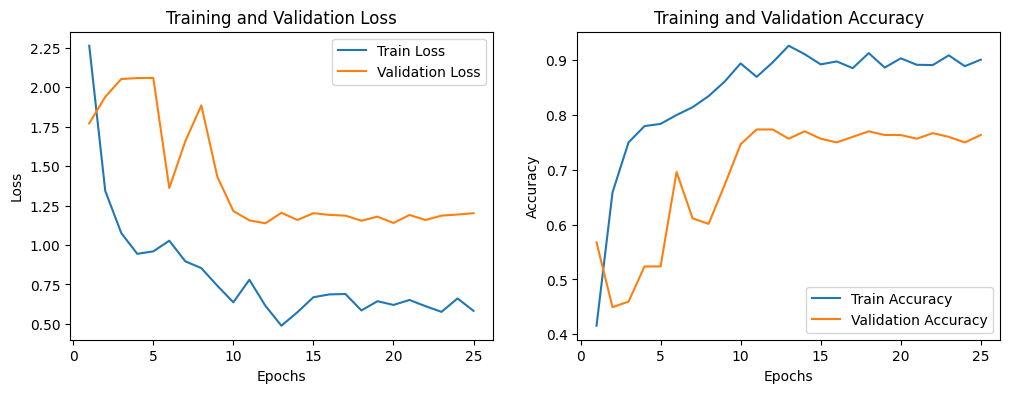

AttributeError: module 'torch.optim' has no attribute 'CosineAnnealingLR'

In [23]:
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt

# Define the model
def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

train_labels = [label for _, label in train_samples]
# Assuming train_labels contains all the labels from training dataset
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.FloatTensor(class_weights).to(device)

# Define loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Training function
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

            for batch_idx, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Apply Mixup
                inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha= 0.2)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
                loss.backward()

                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_epoch_loss)  # Pass validation loss to scheduler
        else:
            scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# List of different step_size and gamma values
step_sizes = [5]
gammas = [0.5]

# Store the results
results = []

for step_size in step_sizes:
    for gamma in gammas:
        print(f"Training with step_size={step_size} and gamma={gamma}")
        model = create_model()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)
        #scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)
        #optimizer = optim.Adam(model.parameters(), lr=0.0001)
        #scheduler = optim.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)
        #optimizer = optim.Adam(model.parameters(), lr=0.001)
        #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

        model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
        )

        results.append({
            'step_size': step_size,
            'gamma': gamma,
            'val_acc': max(val_accuracies),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

# Find the best result
best_result = max(results, key=lambda x: x['val_acc'])
print(f"Best step_size: {best_result['step_size']}, Best gamma: {best_result['gamma']}, Validation Accuracy: {best_result['val_acc']}")

# Plot the results of the best model
def plot_training(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training(best_result['train_losses'], best_result['val_losses'], best_result['train_accuracies'], best_result['val_accuracies'])

# Evaluate the best model on test data
best_model = create_model()
#optimizer = optim.Adam(best_model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=best_result['step_size'], gamma=best_result['gamma'])
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

best_model, _, _, _, _ = train_model(
    best_model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
)

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

evaluate_model(best_model, test_loader)

In [31]:
#more works to do
#hyperparameter fitting
#999999

from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt

# Define the model
def create_model():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

train_labels = [label for _, label in train_samples]
# Assuming train_labels contains all the labels from training dataset
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.FloatTensor(class_weights).to(device)

# Define loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Training function
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha= 0.2)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_epoch_loss)  # Pass validation loss to scheduler
        else:
            scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Hyperparameter configurations
learning_rates = [0.0001, 0.0003]
weight_decays = [1e-2, 1e-4]
schedulers = [
    lambda opt: ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=3, verbose=True),
    lambda opt: CosineAnnealingLR(opt, T_max=10, eta_min=1e-6)
]

# Store the results
results = []

for lr in learning_rates:
    for wd in weight_decays:
        for scheduler_fn in schedulers:
            print(f"Training with lr={lr}, weight_decay={wd}")
            model = create_model()
            optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
            scheduler = scheduler_fn(optimizer)

            model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
                model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
            )

            results.append({
                'lr': lr,
                'weight_decay': wd,
                'scheduler': scheduler.__class__.__name__,
                'val_acc': max(val_accuracies),
                'train_losses': train_losses,
                'val_losses': val_losses,
                'train_accuracies': train_accuracies,
                'val_accuracies': val_accuracies
            })

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user("Model Training Results", pd.DataFrame(results))


Training with lr=0.0001, weight_decay=0.01
Epoch [1/25] Train Loss: 2.3917, Train Acc: 0.3796, Val Loss: 1.3890, Val Acc: 0.6284
Epoch [2/25] Train Loss: 1.1664, Train Acc: 0.7305, Val Loss: 1.0612, Val Acc: 0.7331
Epoch [3/25] Train Loss: 0.8913, Train Acc: 0.8102, Val Loss: 1.1420, Val Acc: 0.6959
Epoch [4/25] Train Loss: 0.8082, Train Acc: 0.8482, Val Loss: 1.0301, Val Acc: 0.7500
Epoch [5/25] Train Loss: 0.7778, Train Acc: 0.8481, Val Loss: 0.9606, Val Acc: 0.7804
Epoch [6/25] Train Loss: 0.7179, Train Acc: 0.8653, Val Loss: 0.9126, Val Acc: 0.7804
Epoch [7/25] Train Loss: 0.6542, Train Acc: 0.8881, Val Loss: 0.9475, Val Acc: 0.7669
Epoch [8/25] Train Loss: 0.5650, Train Acc: 0.9072, Val Loss: 0.9913, Val Acc: 0.7601
Epoch [9/25] Train Loss: 0.6719, Train Acc: 0.8848, Val Loss: 1.1161, Val Acc: 0.7432
Epoch [10/25] Train Loss: 0.6335, Train Acc: 0.8952, Val Loss: 1.0516, Val Acc: 0.7770
Epoch 00010: reducing learning rate of group 0 to 1.0000e-05.
Epoch [11/25] Train Loss: 0.6001, 

ModuleNotFoundError: No module named 'ace_tools'

In [24]:
import random

# Function to sample a maximum of 50 instances per class
def sample_max_50(samples, dynamic_size= 50):
    sampled_samples = []
    class_count = Counter([label for _, label in samples])
    class_samples = {k: [] for k in class_count.keys()}
    
    for img_path, label in samples:
        class_samples[label].append((img_path, label))
    
    for cls in class_samples.keys():
        sampled_samples.extend(random.sample(class_samples[cls], min(dynamic_size, class_count[cls])))
    
    return sampled_samples

# Filter samples for high and low instance classes
def filter_samples(samples, target_classes):
    return [(img_path, label) for img_path, label in samples if label in target_classes]

# Classes with high and low number of instances (as an example)
high_instance_classes = [0, 7, 13, 19, 20, 27, 38, 39, 41]
low_instance_classes = [10, 15, 24, 28, 30, 34, 40]
#high_instance_classes = [0, 19, 20, 27, 7, 41, 13, 38, 39]
#low_instance_classes = [24, 42, 11, 33, 14, 16, 34, 36, 15, 29, 10, 31, 35, 40, 28]


# Prepare datasets
train_samples_50 = sample_max_50(train_samples)
train_samples_high = filter_samples(train_samples, high_instance_classes)
train_samples_low = filter_samples(train_samples, low_instance_classes)

# Create datasets
train_dataset_50 = CustomImageDataset(samples=train_samples_50, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])
train_dataset_high = CustomImageDataset(samples=train_samples_high, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])
train_dataset_low = CustomImageDataset(samples=train_samples_low, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])

# Create DataLoaders
train_loader_50 = DataLoader(train_dataset_50, batch_size=32, shuffle=True, num_workers=4)
train_loader_high = DataLoader(train_dataset_high, batch_size=32, shuffle=True, num_workers=4)
train_loader_low = DataLoader(train_dataset_low, batch_size=32, shuffle=True, num_workers=4)


NameError: name 'class_to_idx' is not defined

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

class EnsembleModel(nn.Module):
    def __init__(self, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.model_high = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.model_low = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        num_ftrs_50 = self.model_50.fc.in_features
        num_ftrs_high = self.model_high.fc.in_features
        num_ftrs_low = self.model_low.fc.in_features
        
        self.model_50.fc = nn.Sequential(
            nn.Linear(num_ftrs_50, 512),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(512, num_classes)
        )
        
        self.model_high.fc = nn.Sequential(
            nn.Linear(num_ftrs_high, 512),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(512, num_classes)
        )
        
        self.model_low.fc = nn.Sequential(
            nn.Linear(num_ftrs_low, 512),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(512, num_classes)
        )
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x_50, x_high, x_low):
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out

# Instantiate the ensemble model
num_classes = 43
ensemble_model = EnsembleModel(num_classes).to(device)


In [26]:
import optuna
import torch.optim as optim

def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
    
    # Instantiate the ensemble model
    num_classes = 43
    ensemble_model = EnsembleModel(num_classes).to(device)
    
    # Define optimizer and scheduler
    optimizer = optim.Adam(ensemble_model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    # Train the model
    ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25)
    
    # Evaluate the model
    val_acc = evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)
    
    return val_acc


In [27]:
def train_individual_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
    return model

# Define loss function and optimizers
criterion = nn.CrossEntropyLoss()

optimizer_50 = optim.Adam(ensemble_model.model_50.parameters(), lr=0.001)
optimizer_high = optim.Adam(ensemble_model.model_high.parameters(), lr=0.001)
optimizer_low = optim.Adam(ensemble_model.model_low.parameters(), lr=0.001)

scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)
scheduler_high = optim.lr_scheduler.StepLR(optimizer_high, step_size=5, gamma=0.5)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

# Train each model separately
ensemble_model.model_50 = train_individual_model(ensemble_model.model_50, train_loader_50, val_loader, criterion, optimizer_50, scheduler_50)
ensemble_model.model_high = train_individual_model(ensemble_model.model_high, train_loader_high, val_loader, criterion, optimizer_high, scheduler_high)
ensemble_model.model_low = train_individual_model(ensemble_model.model_low, train_loader_low, val_loader, criterion, optimizer_low, scheduler_low)


Epoch [1/25] Loss: 3.5965, Accuracy: 0.0975
Epoch [2/25] Loss: 3.0304, Accuracy: 0.1735
Epoch [3/25] Loss: 2.5865, Accuracy: 0.2628
Epoch [4/25] Loss: 2.4412, Accuracy: 0.2949
Epoch [5/25] Loss: 2.2468, Accuracy: 0.3462
Epoch [6/25] Loss: 1.8180, Accuracy: 0.4200
Epoch [7/25] Loss: 1.5580, Accuracy: 0.4907
Epoch [8/25] Loss: 1.4165, Accuracy: 0.5339
Epoch [9/25] Loss: 1.3153, Accuracy: 0.5637
Epoch [10/25] Loss: 1.2207, Accuracy: 0.6054
Epoch [11/25] Loss: 1.0228, Accuracy: 0.6672
Epoch [12/25] Loss: 0.8570, Accuracy: 0.7208
Epoch [13/25] Loss: 0.7908, Accuracy: 0.7372
Epoch [14/25] Loss: 0.7066, Accuracy: 0.7617
Epoch [15/25] Loss: 0.6423, Accuracy: 0.8019
Epoch [16/25] Loss: 0.5003, Accuracy: 0.8421
Epoch [17/25] Loss: 0.4872, Accuracy: 0.8459
Epoch [18/25] Loss: 0.4119, Accuracy: 0.8645
Epoch [19/25] Loss: 0.3917, Accuracy: 0.8831
Epoch [20/25] Loss: 0.3715, Accuracy: 0.8913
Epoch [21/25] Loss: 0.3428, Accuracy: 0.9084
Epoch [22/25] Loss: 0.3254, Accuracy: 0.9173
Epoch [23/25] Loss:

In [28]:
def pad_or_truncate_batch(batch, target_size):
    """Pad or truncate batch to the target size."""
    if batch.size(0) > target_size:
        return batch[:target_size]
    elif batch.size(0) < target_size:
        padding = torch.zeros((target_size - batch.size(0), *batch.size()[1:]), device=batch.device)
        return torch.cat((batch, padding), dim=0)
    return batch

def train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25):
    ensemble_model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        len_50 = len(train_loader_50)
        len_high = len(train_loader_high)
        len_low = len(train_loader_low)
        max_len = max(len_50, len_high, len_low)
        
        train_iter_50 = iter(cycle(train_loader_50))
        train_iter_high = iter(cycle(train_loader_high))
        train_iter_low = iter(cycle(train_loader_low))

        for _ in range(max_len):
            inputs_50, labels_50 = next(train_iter_50)
            inputs_high, labels_high = next(train_iter_high)
            inputs_low, labels_low = next(train_iter_low)

            min_batch_size = min(inputs_50.size(0), inputs_high.size(0), inputs_low.size(0))
            inputs_50, labels_50 = pad_or_truncate_batch(inputs_50, min_batch_size).to(device), labels_50[:min_batch_size].to(device)
            inputs_high, labels_high = pad_or_truncate_batch(inputs_high, min_batch_size).to(device), labels_high[:min_batch_size].to(device)
            inputs_low, labels_low = pad_or_truncate_batch(inputs_low, min_batch_size).to(device), labels_low[:min_batch_size].to(device)
            
            optimizer.zero_grad()
            outputs = ensemble_model(inputs_50, inputs_high, inputs_low)
            loss = criterion(outputs, labels_50)  # Assuming all labels are the same
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs_50.size(0)
            _, predicted = outputs.max(1)
            total += labels_50.size(0)
            correct += predicted.eq(labels_50).sum().item()
            
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
    
    return ensemble_model

# Train the ensemble model
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 6.8281, Accuracy: 0.0490
Epoch [2/25] Loss: 3.8729, Accuracy: 0.1312
Epoch [3/25] Loss: 2.9339, Accuracy: 0.2495
Epoch [4/25] Loss: 2.3010, Accuracy: 0.3504
Epoch [5/25] Loss: 1.9625, Accuracy: 0.4088
Epoch [6/25] Loss: 1.6960, Accuracy: 0.4946
Epoch [7/25] Loss: 1.5021, Accuracy: 0.5220
Epoch [8/25] Loss: 1.4066, Accuracy: 0.5746
Epoch [9/25] Loss: 1.3239, Accuracy: 0.5746
Epoch [10/25] Loss: 1.2410, Accuracy: 0.5984
Epoch [11/25] Loss: 1.2292, Accuracy: 0.6251
Epoch [12/25] Loss: 1.1522, Accuracy: 0.6352
Epoch [13/25] Loss: 1.1129, Accuracy: 0.6619
Epoch [14/25] Loss: 1.0937, Accuracy: 0.6489
Epoch [15/25] Loss: 1.1101, Accuracy: 0.6424
Epoch [16/25] Loss: 1.0471, Accuracy: 0.6893
Epoch [17/25] Loss: 1.0374, Accuracy: 0.6691
Epoch [18/25] Loss: 1.0054, Accuracy: 0.6820
Epoch [19/25] Loss: 0.9978, Accuracy: 0.6849
Epoch [20/25] Loss: 0.9684, Accuracy: 0.7044
Epoch [21/25] Loss: 1.0272, Accuracy: 0.6734
Epoch [22/25] Loss: 0.9731, Accuracy: 0.7058
Epoch [23/25] Loss:

In [29]:
val_samples_50 = sample_max_50(val_samples)
val_samples_high = filter_samples(val_samples, high_instance_classes)
val_samples_low = filter_samples(val_samples, low_instance_classes)

# Create datasets
val_dataset_50 = CustomImageDataset(samples=val_samples_50, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
val_dataset_high = CustomImageDataset(samples=val_samples_high, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
val_dataset_low = CustomImageDataset(samples=val_samples_low, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])

# Create DataLoaders
val_loader_50 = DataLoader(val_dataset_50, batch_size=32, shuffle=False, num_workers=4)
val_loader_high = DataLoader(val_dataset_high, batch_size=32, shuffle=False, num_workers=4)
val_loader_low = DataLoader(val_dataset_low, batch_size=32, shuffle=False, num_workers=4)

def evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    len_50 = len(val_loader_50)
    len_high = len(val_loader_high)
    len_low = len(val_loader_low)
    max_len = max(len_50, len_high, len_low)
    
    val_iter_50 = iter(cycle(val_loader_50))
    val_iter_high = iter(cycle(val_loader_high))
    val_iter_low = iter(cycle(val_loader_low))

    with torch.no_grad():
        for _ in range(max_len):
            inputs_50, labels_50 = next(val_iter_50)
            inputs_high, labels_high = next(val_iter_high)
            inputs_low, labels_low = next(val_iter_low)

            min_batch_size = min(inputs_50.size(0), inputs_high.size(0), inputs_low.size(0))
            inputs_50, labels_50 = pad_or_truncate_batch(inputs_50, min_batch_size).to(device), labels_50[:min_batch_size].to(device)
            inputs_high, labels_high = pad_or_truncate_batch(inputs_high, min_batch_size).to(device), labels_high[:min_batch_size].to(device)
            inputs_low, labels_low = pad_or_truncate_batch(inputs_low, min_batch_size).to(device), labels_low[:min_batch_size].to(device)
            
            outputs = ensemble_model(inputs_50, inputs_high, inputs_low)
            _, predicted = outputs.max(1)
            total += labels_50.size(0)
            correct += predicted.eq(labels_50).sum().item()

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy:.4f}')
    return accuracy

evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)


NameError: name 'class_to_idx' is not defined

In [ ]:
import optuna
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# Define data transforms, dataset classes, and data loaders here
# ...

# Define the EnsembleModel class here
# ...

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-3)
    
    # Instantiate the ensemble model
    num_classes = 43
    ensemble_model = EnsembleModel(num_classes).to(device)
    
    # Define optimizer and scheduler
    optimizer = optim.Adam(ensemble_model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    # Train the model
    ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25)
    
    # Evaluate the model
    val_acc = evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)
    
    return val_acc

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Train the final model with the best hyperparameters
best_lr = best_params['lr']
best_weight_decay = best_params['weight_decay']

ensemble_model = EnsembleModel(num_classes).to(device)
optimizer = optim.Adam(ensemble_model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25)

# Evaluate the final model
test_acc = evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)
print(f"Test Accuracy: {test_acc:.4f}")


In [32]:
#GroceryStoreDataset
# Load the datasets
train_dataset = GroceryStoreDataset(split='train', transform=data_transforms['train'])
val_dataset = GroceryStoreDataset(split='val', transform=data_transforms['val'])
test_dataset = GroceryStoreDataset(split='test', transform=data_transforms['test'])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)


In [33]:
high_instance_classes = [0, 19, 20, 27, 7, 41, 13, 38, 39]
low_instance_classes = [24, 42, 11, 33, 14, 16, 34, 36, 15, 29, 10, 31, 35, 40, 28]


# Prepare datasets
train_samples_50 = sample_max_50(train_samples, dynamic_size= 36)
train_samples_high = filter_samples(train_samples, high_instance_classes)
train_samples_low = filter_samples(train_samples, low_instance_classes)

# Create datasets
train_dataset_50 = CustomImageDataset(samples=train_samples_50, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])
train_dataset_high = CustomImageDataset(samples=train_samples_high, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])
train_dataset_low = CustomImageDataset(samples=train_samples_low, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['train'])

# Create DataLoaders
train_loader_50 = DataLoader(train_dataset_50, batch_size=32, shuffle=True, num_workers=4)
train_loader_high = DataLoader(train_dataset_high, batch_size=32, shuffle=True, num_workers=4)
train_loader_low = DataLoader(train_dataset_low, batch_size=32, shuffle=True, num_workers=4)
ensemble_model = EnsembleModel(num_classes).to(device)
criterion = nn.CrossEntropyLoss()

optimizer_50 = optim.Adam(ensemble_model.model_50.parameters(), lr=0.001)
optimizer_high = optim.Adam(ensemble_model.model_high.parameters(), lr=0.001)
optimizer_low = optim.Adam(ensemble_model.model_low.parameters(), lr=0.001)

scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)
scheduler_high = optim.lr_scheduler.StepLR(optimizer_high, step_size=5, gamma=0.5)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

# Train each model separately
ensemble_model.model_50 = train_individual_model(ensemble_model.model_50, train_loader_50, val_loader, criterion, optimizer_50, scheduler_50)
ensemble_model.model_high = train_individual_model(ensemble_model.model_high, train_loader_high, val_loader, criterion, optimizer_high, scheduler_high)
ensemble_model.model_low = train_individual_model(ensemble_model.model_low, train_loader_low, val_loader, criterion, optimizer_low, scheduler_low)
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)
val_samples_50 = sample_max_50(val_samples)
val_samples_high = filter_samples(val_samples, high_instance_classes)
val_samples_low = filter_samples(val_samples, low_instance_classes)

# Create datasets
val_dataset_50 = CustomImageDataset(samples=val_samples_50, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
val_dataset_high = CustomImageDataset(samples=val_samples_high, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
val_dataset_low = CustomImageDataset(samples=val_samples_low, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])

# Create DataLoaders
val_loader_50 = DataLoader(val_dataset_50, batch_size=32, shuffle=False, num_workers=4)
val_loader_high = DataLoader(val_dataset_high, batch_size=32, shuffle=False, num_workers=4)
val_loader_low = DataLoader(val_dataset_low, batch_size=32, shuffle=False, num_workers=4)

evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)
"""study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Train the final model with the best hyperparameters
best_lr = best_params['lr']
best_weight_decay = best_params['weight_decay']

ensemble_model = EnsembleModel(num_classes).to(device)
optimizer = optim.Adam(ensemble_model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25)

# Evaluate the final model
test_acc = evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)
print(f"Test Accuracy: {test_acc:.4f}")"""

NameError: name 'class_to_idx' is not defined

In [ ]:
#val_dataset_50 = GroceryStoreDataset(samples=val_samples_50, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
#val_dataset_high = GroceryStoreDataset(samples=val_samples_high, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])
#val_dataset_low = GroceryStoreDataset(samples=val_samples_low, class_to_idx=class_to_idx, idx_to_class=idx_to_class, transform=data_transforms['val'])

# Create DataLoaders
#val_loader_50 = DataLoader(val_dataset_50, batch_size=32, shuffle=False, num_workers=4)
#val_loader_high = DataLoader(val_dataset_high, batch_size=32, shuffle=False, num_workers=4)
#val_loader_low = DataLoader(val_dataset_low, batch_size=32, shuffle=False, num_workers=4)

evaluate_model(ensemble_model, val_loader_50, val_loader_high, val_loader_low)

In [ ]:
def ensemble_predict(models, inputs):
    outputs = [model(inputs) for model in models]
    avg_output = torch.mean(torch.stack(outputs), dim=0)
    return avg_output

def evaluate_ensemble(models, test_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = ensemble_predict(models, inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

evaluate_ensemble([ensemble_model.model_50, ensemble_model.model_low, ensemble_model.model_high], val_loader)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from itertools import cycle
import optuna

class EnsembleModel(nn.Module):
    def __init__(self, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.model_high = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.model_low = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        num_ftrs_50 = self.model_50.fc.in_features
        num_ftrs_high = self.model_high.fc.in_features
        num_ftrs_low = self.model_low.fc.in_features
        
        self.model_50.fc = nn.Sequential(
            nn.Linear(num_ftrs_50, 512),
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.Linear(512, num_classes)
        )
        
        self.model_high.fc = nn.Sequential(
            nn.Linear(num_ftrs_high, 512),
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.Linear(512, num_classes)
        )
        
        self.model_low.fc = nn.Sequential(
            nn.Linear(num_ftrs_low, 512),
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.Linear(512, num_classes)
        )
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x_50, x_high, x_low):
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out

# Instantiate the ensemble model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 43
ensemble_model = EnsembleModel(num_classes).to(device)

def pad_or_truncate_batch(batch, target_size):
    """Pad or truncate batch to the target size."""
    if batch.size(0) > target_size:
        return batch[:target_size]
    elif batch.size(0) < target_size:
        padding = torch.zeros((target_size - batch.size(0), *batch.size()[1:]), device=batch.device)
        return torch.cat((batch, padding), dim=0)
    return batch

def train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        len_50 = len(train_loader_50)
        len_high = len(train_loader_high)
        len_low = len(train_loader_low)
        max_len = max(len_50, len_high, len_low)
        
        train_iter_50 = iter(cycle(train_loader_50))
        train_iter_high = iter(cycle(train_loader_high))
        train_iter_low = iter(cycle(train_loader_low))

        for _ in range(max_len):
            inputs_50, labels_50 = next(train_iter_50)
            inputs_high, labels_high = next(train_iter_high)
            inputs_low, labels_low = next(train_iter_low)

            min_batch_size = min(inputs_50.size(0), inputs_high.size(0), inputs_low.size(0))
            inputs_50, labels_50 = pad_or_truncate_batch(inputs_50, min_batch_size).to(device), labels_50[:min_batch_size].to(device)
            inputs_high, labels_high = pad_or_truncate_batch(inputs_high, min_batch_size).to(device), labels_high[:min_batch_size].to(device)
            inputs_low, labels_low = pad_or_truncate_batch(inputs_low, min_batch_size).to(device), labels_low[:min_batch_size].to(device)
            
            optimizer.zero_grad()
            outputs = ensemble_model(inputs_50, inputs_high, inputs_low)
            loss = criterion(outputs, labels_50)  # Assuming all labels are the same
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs_50.size(0)
            _, predicted = outputs.max(1)
            total += labels_50.size(0)
            correct += predicted.eq(labels_50).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for batch in val_loader:
            if len(batch) == 4:  # If val_loader returns (inputs_50, inputs_high, inputs_low, labels)
                inputs_50, inputs_high, inputs_low, labels = batch
            elif len(batch) == 2:  # If val_loader returns ((inputs_50, inputs_high, inputs_low), labels)
                (inputs_50, inputs_high, inputs_low), labels = batch
            else:
                raise ValueError("Unexpected batch format.")
                
            inputs_50, inputs_high, inputs_low, labels = inputs_50.to(device), inputs_high.to(device), inputs_low.to(device), labels.to(device)
            outputs = ensemble_model(inputs_50, inputs_high, inputs_low)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.parameters(), lr=0.001)
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader_50, train_loader_high, train_loader_low, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Train an individual ResNet model
def train_individual_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
    return model

# Instantiate and train individual models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 43

# Model for 50_train_data
model_50 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_50 = model_50.fc.in_features
model_50.fc = nn.Linear(num_ftrs_50, num_classes)
model_50 = model_50.to(device)

optimizer_50 = optim.Adam(model_50.parameters(), lr=0.001)
scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)

model_50 = train_individual_model(model_50, train_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)

# Model for high_train_data
model_high = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_high = model_high.fc.in_features
model_high.fc = nn.Linear(num_ftrs_high, num_classes)
model_high = model_high.to(device)

optimizer_high = optim.Adam(model_high.parameters(), lr=0.001)
scheduler_high = optim.lr_scheduler.StepLR(optimizer_high, step_size=5, gamma=0.5)

model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)

# Model for low_train_data
model_low = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_low = model_low.fc.in_features
model_low.fc = nn.Linear(num_ftrs_low, num_classes)
model_low = model_low.to(device)

optimizer_low = optim.Adam(model_low.parameters(), lr=0.001)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

model_low = train_individual_model(model_low, train_loader_low, nn.CrossEntropyLoss(), optimizer_low, scheduler_low)


Epoch [1/25] Loss: 2.2534, Accuracy: 0.3760
Epoch [2/25] Loss: 1.0765, Accuracy: 0.6843
Epoch [3/25] Loss: 0.7446, Accuracy: 0.7774
Epoch [4/25] Loss: 0.6020, Accuracy: 0.8206
Epoch [5/25] Loss: 0.5354, Accuracy: 0.8384
Epoch [6/25] Loss: 0.3445, Accuracy: 0.8958
Epoch [7/25] Loss: 0.1273, Accuracy: 0.9598
Epoch [8/25] Loss: 0.0639, Accuracy: 0.9829
Epoch [9/25] Loss: 0.0656, Accuracy: 0.9881
Epoch [10/25] Loss: 0.0438, Accuracy: 0.9903
Epoch [11/25] Loss: 0.0328, Accuracy: 0.9940
Epoch [12/25] Loss: 0.0283, Accuracy: 0.9940
Epoch [13/25] Loss: 0.0184, Accuracy: 0.9985
Epoch [14/25] Loss: 0.0218, Accuracy: 0.9940
Epoch [15/25] Loss: 0.0163, Accuracy: 0.9978
Epoch [16/25] Loss: 0.0101, Accuracy: 1.0000
Epoch [17/25] Loss: 0.0165, Accuracy: 0.9970
Epoch [18/25] Loss: 0.0111, Accuracy: 0.9993
Epoch [19/25] Loss: 0.0095, Accuracy: 0.9993
Epoch [20/25] Loss: 0.0094, Accuracy: 0.9985
Epoch [21/25] Loss: 0.0112, Accuracy: 0.9985
Epoch [22/25] Loss: 0.0099, Accuracy: 0.9985
Epoch [23/25] Loss:

In [35]:
# Define the ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = model_50
        self.model_high = model_high
        self.model_low = model_low
        
        # Freeze the submodels' parameters
        for param in self.model_50.parameters():
            param.requires_grad = False
        for param in self.model_high.parameters():
            param.requires_grad = False
        for param in self.model_low.parameters():
            param.requires_grad = False
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x_50, x_high, x_low):
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out

# Instantiate the ensemble model
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)


In [36]:
def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 2.1995, Accuracy: 0.5023
Validation Accuracy: 0.5777
Epoch [2/25] Loss: 0.6754, Accuracy: 0.8523
Validation Accuracy: 0.6014
Epoch [3/25] Loss: 0.3659, Accuracy: 0.9394
Validation Accuracy: 0.6892
Epoch [4/25] Loss: 0.2569, Accuracy: 0.9534
Validation Accuracy: 0.6689
Epoch [5/25] Loss: 0.2158, Accuracy: 0.9568
Validation Accuracy: 0.6486
Epoch [6/25] Loss: 0.1582, Accuracy: 0.9697
Validation Accuracy: 0.6824
Epoch [7/25] Loss: 0.1546, Accuracy: 0.9746
Validation Accuracy: 0.7027
Epoch [8/25] Loss: 0.1346, Accuracy: 0.9765
Validation Accuracy: 0.6858
Epoch [9/25] Loss: 0.1334, Accuracy: 0.9754
Validation Accuracy: 0.6993
Epoch [10/25] Loss: 0.1194, Accuracy: 0.9773
Validation Accuracy: 0.7365
Epoch [11/25] Loss: 0.1017, Accuracy: 0.9830
Validation Accuracy: 0.7027
Epoch [12/25] Loss: 0.1062, Accuracy: 0.9780
Validation Accuracy: 0.7128
Epoch [13/25] Loss: 0.0936, Accuracy: 0.9822
Validation Accuracy: 0.6993
Epoch [14/25] Loss: 0.0985, Accuracy: 0.9803
Validation Accu

In [37]:
evaluate_model(ensemble_model, val_loader)

0.7027027027027027

In [ ]:
#ensemble, ensembele, with early stop

In [38]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.model = None
    
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.model = model
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.model = model
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

    def get_model(self):
        return self.model


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

dp_50 = 0.4
dp_low = 0.4

# Train an individual ResNet model with early stopping
def train_individual_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5, sch_platue= False):
    early_stopping = EarlyStopping(patience=patience)
    best_val = 0
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        if sch_platue == False:
            scheduler.step()

        # Validation step
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        model.eval()
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_labels).item() * val_inputs.size(0)
                _, val_predicted = val_outputs.max(1)
                val_total += val_labels.size(0)
                val_correct += val_predicted.eq(val_labels).sum().item()
        val_loss /= val_total
        val_acc = val_correct / val_total
        print(f'Epoch [{epoch+1}/{num_epochs}] Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
        
        if sch_platue:
            scheduler.step(val_acc)
        if val_acc > best_val:
            best_val = val_acc
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            model = early_stopping.get_model()
            break
        model.train()
    
    print("val_accuracy", best_val)
    return model

class CustomResNet(nn.Module):
    def __init__(self, num_classes, dp=0.5):
        super(CustomResNet, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Dropout(dp),
            nn.Linear(num_ftrs, num_classes)
        )
    
    def forward(self, x):
        return self.resnet(x)


In [40]:
# Instantiate and train individual models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 43

# Model for 50_train_data
"""model_50 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_50 = model_50.fc.in_features
model_50.fc = nn.Linear(num_ftrs_50, num_classes)
model_50 = model_50.to(device)"""
model_50 = CustomResNet(num_classes, dp_50).to(device)

optimizer_50 = optim.Adam(model_50.parameters(), lr=0.001)
scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)

model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)

# Model for high_train_data
"""model_high = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_high = model_high.fc.in_features
model_high.fc = nn.Linear(num_ftrs_high, num_classes)
model_high = model_high.to(device)"""
model_high = CustomResNet(num_classes, 0.7).to(device)

optimizer_high = optim.Adam(model_high.parameters(), lr=0.001)
scheduler_high = optim.lr_scheduler.StepLR(optimizer_high, step_size=5, gamma=0.5)

model_high = train_individual_model(model_high, train_loader_high, val_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)

# Model for low_train_data
"""model_low = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs_low = model_low.fc.in_features
model_low.fc = nn.Linear(num_ftrs_low, num_classes)
model_low = model_low.to(device)"""
model_low = CustomResNet(num_classes, dp_low).to(device)

optimizer_low = optim.Adam(model_low.parameters(), lr=0.001)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

model_low = train_individual_model(model_low, train_loader_low, val_loader_low, nn.CrossEntropyLoss(), optimizer_low, scheduler_low)


Epoch [1/25] Train Loss: 2.5210, Accuracy: 0.3254
Epoch [1/25] Val Loss: 2.6298, Val Accuracy: 0.3547
Epoch [2/25] Train Loss: 1.3345, Accuracy: 0.5905
Epoch [2/25] Val Loss: 2.4578, Val Accuracy: 0.3716
Epoch [3/25] Train Loss: 0.9210, Accuracy: 0.7178
Epoch [3/25] Val Loss: 1.8120, Val Accuracy: 0.5034
Epoch [4/25] Train Loss: 0.7272, Accuracy: 0.7774
Epoch [4/25] Val Loss: 2.3815, Val Accuracy: 0.4223
Epoch [5/25] Train Loss: 0.5742, Accuracy: 0.8228
Epoch [5/25] Val Loss: 2.9885, Val Accuracy: 0.3682
Epoch [6/25] Train Loss: 0.3880, Accuracy: 0.8868
Epoch [6/25] Val Loss: 1.5863, Val Accuracy: 0.5304
Epoch [7/25] Train Loss: 0.1770, Accuracy: 0.9494
Epoch [7/25] Val Loss: 1.3281, Val Accuracy: 0.6250
Epoch [8/25] Train Loss: 0.1266, Accuracy: 0.9695
Epoch [8/25] Val Loss: 1.3827, Val Accuracy: 0.6182
Epoch [9/25] Train Loss: 0.0962, Accuracy: 0.9784
Epoch [9/25] Val Loss: 1.4594, Val Accuracy: 0.6182
Epoch [10/25] Train Loss: 0.1133, Accuracy: 0.9717
Epoch [10/25] Val Loss: 2.3191,

In [41]:
def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    early_stopping = EarlyStopping(patience=patience)
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        ensemble_model.eval()
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                
                out_50 = ensemble_model.model_50(val_inputs)
                out_high = ensemble_model.model_high(val_inputs)
                out_low = ensemble_model.model_low(val_inputs)
                
                combined_out = torch.cat((out_50, out_high, out_low), dim=1)
                outputs = ensemble_model.fc(combined_out)
                
                val_loss += criterion(outputs, val_labels).item() * val_inputs.size(0)
                _, val_predicted = outputs.max(1)
                val_total += val_labels.size(0)
                val_correct += val_predicted.eq(val_labels).sum().item()
        
        val_loss /= val_total
        val_acc = val_correct / val_total
        print(f'Epoch [{epoch+1}/{num_epochs}] Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
        
        early_stopping(val_loss, ensemble_model)
        if early_stopping.early_stop:
            print("Early stopping")
            ensemble_model = early_stopping.get_model()
            break

        ensemble_model.train()
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 0.1346, Accuracy: 0.9693
Epoch [1/25] Val Loss: 1.1537, Val Accuracy: 0.6791
Epoch [2/25] Loss: 0.1167, Accuracy: 0.9670
Epoch [2/25] Val Loss: 1.2552, Val Accuracy: 0.6892
Epoch [3/25] Loss: 0.0850, Accuracy: 0.9784
Epoch [3/25] Val Loss: 1.1790, Val Accuracy: 0.6791
Epoch [4/25] Loss: 0.0891, Accuracy: 0.9761
Epoch [4/25] Val Loss: 1.3539, Val Accuracy: 0.6689
Epoch [5/25] Loss: 0.0850, Accuracy: 0.9731
Epoch [5/25] Val Loss: 1.1902, Val Accuracy: 0.6993
Epoch [6/25] Loss: 0.0598, Accuracy: 0.9860
Epoch [6/25] Val Loss: 1.1628, Val Accuracy: 0.7027
Early stopping


In [42]:
dp_50 = 0.4
dp_low = 0.4
lr_list = [0.0001, 0.001]
gam_list = [0.2, 0.5, 0.8]
s_list = [3, ]

model_50 = CustomResNet(num_classes, dp_50).to(device)
"""for l in lr_list:
    for g in gam_list:
        for ss in s_list:"""

optimizer_50 = optim.Adam(model_50.parameters(), lr=0.001)
scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)

model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)


Epoch [1/25] Train Loss: 2.5009, Accuracy: 0.3284
Epoch [1/25] Val Loss: 5.0183, Val Accuracy: 0.2027
Epoch [2/25] Train Loss: 1.3113, Accuracy: 0.6031
Epoch [2/25] Val Loss: 2.1786, Val Accuracy: 0.4054
Epoch [3/25] Train Loss: 0.9289, Accuracy: 0.7096
Epoch [3/25] Val Loss: 2.4851, Val Accuracy: 0.4020
Epoch [4/25] Train Loss: 0.7115, Accuracy: 0.7878
Epoch [4/25] Val Loss: 2.1300, Val Accuracy: 0.4459
Epoch [5/25] Train Loss: 0.5307, Accuracy: 0.8459
Epoch [5/25] Val Loss: 2.3687, Val Accuracy: 0.4797
Epoch [6/25] Train Loss: 0.2857, Accuracy: 0.9241
Epoch [6/25] Val Loss: 1.7700, Val Accuracy: 0.5034
Epoch [7/25] Train Loss: 0.1593, Accuracy: 0.9613
Epoch [7/25] Val Loss: 1.3634, Val Accuracy: 0.6216
Epoch [8/25] Train Loss: 0.1086, Accuracy: 0.9695
Epoch [8/25] Val Loss: 1.4109, Val Accuracy: 0.6047
Epoch [9/25] Train Loss: 0.1147, Accuracy: 0.9695
Epoch [9/25] Val Loss: 1.4710, Val Accuracy: 0.5980
Epoch [10/25] Train Loss: 0.0758, Accuracy: 0.9866
Epoch [10/25] Val Loss: 1.5534,

In [43]:
dp_50 = 0.4
dp_low = 0.4
lr_list = [0.0001, 0.001]
gam_list = [0.2, 0.5, 0.8]
s_list = [3, ]

model_50 = CustomResNet(num_classes, dp_50).to(device)
"""for l in lr_list:
    for g in gam_list:
        for ss in s_list:"""
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

optimizer_50 = AdamW(model_50.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = CosineAnnealingLR(optimizer_50, T_max=25, eta_min=1e-6)

#optimizer_50 = optim.Adam(model_50.parameters(), lr=0.001)
#scheduler_50 = optim.lr_scheduler.StepLR(optimizer_50, step_size=5, gamma=0.5)

model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)


Epoch [1/25] Train Loss: 2.6776, Accuracy: 0.2964
Epoch [1/25] Val Loss: 5.2916, Val Accuracy: 0.1182
Epoch [2/25] Train Loss: 1.4368, Accuracy: 0.5763
Epoch [2/25] Val Loss: 3.7157, Val Accuracy: 0.2500
Epoch [3/25] Train Loss: 1.0882, Accuracy: 0.6709
Epoch [3/25] Val Loss: 2.1385, Val Accuracy: 0.4088
Epoch [4/25] Train Loss: 0.7377, Accuracy: 0.7796
Epoch [4/25] Val Loss: 1.9804, Val Accuracy: 0.4831
Epoch [5/25] Train Loss: 0.5942, Accuracy: 0.8273
Epoch [5/25] Val Loss: 2.5285, Val Accuracy: 0.3412
Epoch [6/25] Train Loss: 0.4570, Accuracy: 0.8667
Epoch [6/25] Val Loss: 2.0322, Val Accuracy: 0.4865
Epoch [7/25] Train Loss: 0.3061, Accuracy: 0.8987
Epoch [7/25] Val Loss: 1.9130, Val Accuracy: 0.5236
Epoch [8/25] Train Loss: 0.2431, Accuracy: 0.9278
Epoch [8/25] Val Loss: 1.9207, Val Accuracy: 0.5203
Epoch [9/25] Train Loss: 0.2470, Accuracy: 0.9300
Epoch [9/25] Val Loss: 1.6603, Val Accuracy: 0.5405
Epoch [10/25] Train Loss: 0.1938, Accuracy: 0.9494
Epoch [10/25] Val Loss: 2.0354,

In [44]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

dp_50 = 0.4
dp_low = 0.4
lr_list = [0.001, 0.01, 0.1]
gam_list = [0.8, 0.9, 0.99]
s_list = [1e-4, 1e-5]

model_50 = CustomResNet(num_classes, dp_50).to(device)
for l in lr_list:
    for g in gam_list:
        for ss in s_list:
            print("lr={} -- momentum={} -- decay={}".format(l,g,ss))
            optimizer_50 = optim.SGD(model_50.parameters(), lr=l, momentum=g, weight_decay=ss)
            scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
            model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, sch_platue= True)
            model_50 = CustomResNet(num_classes, dp_50).to(device)

lr=0.001 -- momentum=0.8 -- decay=0.0001
Epoch [1/25] Train Loss: 3.8201, Accuracy: 0.0551
Epoch [1/25] Val Loss: 3.3990, Val Accuracy: 0.1081
Epoch [2/25] Train Loss: 3.2570, Accuracy: 0.1482
Epoch [2/25] Val Loss: 2.9687, Val Accuracy: 0.2196
Epoch [3/25] Train Loss: 2.7358, Accuracy: 0.2941
Epoch [3/25] Val Loss: 2.6042, Val Accuracy: 0.3209
Epoch [4/25] Train Loss: 2.2781, Accuracy: 0.4401
Epoch [4/25] Val Loss: 2.2246, Val Accuracy: 0.4899
Epoch [5/25] Train Loss: 1.9088, Accuracy: 0.5331
Epoch [5/25] Val Loss: 2.0328, Val Accuracy: 0.5169
Epoch [6/25] Train Loss: 1.6356, Accuracy: 0.6016
Epoch [6/25] Val Loss: 1.8425, Val Accuracy: 0.5642
Epoch [7/25] Train Loss: 1.3773, Accuracy: 0.6791
Epoch [7/25] Val Loss: 1.6929, Val Accuracy: 0.5980
Epoch [8/25] Train Loss: 1.2030, Accuracy: 0.7357
Epoch [8/25] Val Loss: 1.5666, Val Accuracy: 0.5946
Epoch [9/25] Train Loss: 1.0703, Accuracy: 0.7625
Epoch [9/25] Val Loss: 1.4684, Val Accuracy: 0.6216
Epoch [10/25] Train Loss: 0.9484, Accurac

In [45]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

dp_50 = 0.4
dp_low = 0.4
lr_list = [0.3,0.4]
gam_list = []
s_list = []


for l in lr_list:
    #for g in gam_list:
        #for ss in s_list:
            print("lr={} -- momentum={} -- decay={}".format(l,g,ss))
            model_50 = CustomResNet(num_classes, l).to(device)
            optimizer_50 = optim.SGD(model_50.parameters(), lr=0.01, momentum=0.8, weight_decay=0.001)
            scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
            model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, sch_platue= True)


lr=0.3 -- momentum=0.99 -- decay=1e-05
Epoch [1/25] Train Loss: 2.6527, Accuracy: 0.3187
Epoch [1/25] Val Loss: 1.8635, Val Accuracy: 0.4189
Epoch [2/25] Train Loss: 0.9240, Accuracy: 0.7364
Epoch [2/25] Val Loss: 1.5926, Val Accuracy: 0.5169
Epoch [3/25] Train Loss: 0.4749, Accuracy: 0.8786
Epoch [3/25] Val Loss: 1.0270, Val Accuracy: 0.6892
Epoch [4/25] Train Loss: 0.2942, Accuracy: 0.9196
Epoch [4/25] Val Loss: 1.1732, Val Accuracy: 0.6757
Epoch [5/25] Train Loss: 0.1984, Accuracy: 0.9553
Epoch [5/25] Val Loss: 1.1358, Val Accuracy: 0.7061
Epoch [6/25] Train Loss: 0.1228, Accuracy: 0.9777
Epoch [6/25] Val Loss: 1.1273, Val Accuracy: 0.6723
Epoch [7/25] Train Loss: 0.1214, Accuracy: 0.9732
Epoch [7/25] Val Loss: 0.8632, Val Accuracy: 0.7331
Epoch [8/25] Train Loss: 0.0813, Accuracy: 0.9814
Epoch [8/25] Val Loss: 1.1281, Val Accuracy: 0.6554
Epoch [9/25] Train Loss: 0.0831, Accuracy: 0.9784
Epoch [9/25] Val Loss: 0.9357, Val Accuracy: 0.7061
Epoch [10/25] Train Loss: 0.0536, Accuracy:

In [46]:
from torch.optim.lr_scheduler import OneCycleLR

dp_50 = 0.4
dp_low = 0.4
lr_list = [0.0001, 0.001]
gam_list = [0.2, 0.5, 0.8]
s_list = [3]

model_50 = CustomResNet(num_classes, dp_50).to(device)
"""for l in lr_list:
    for g in gam_list:
        for ss in s_list:"""


optimizer_50 = AdamW(model_50.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = OneCycleLR(optimizer_50, max_lr=0.01, epochs=25, steps_per_epoch=len(train_loader))


model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50)


Epoch [1/25] Train Loss: 2.3227, Accuracy: 0.3917
Epoch [1/25] Val Loss: 1.9084, Val Accuracy: 0.4493
Epoch [2/25] Train Loss: 0.9025, Accuracy: 0.7401
Epoch [2/25] Val Loss: 1.9578, Val Accuracy: 0.4324
Epoch [3/25] Train Loss: 0.4360, Accuracy: 0.8913
Epoch [3/25] Val Loss: 1.1345, Val Accuracy: 0.6993
Epoch [4/25] Train Loss: 0.3054, Accuracy: 0.9285
Epoch [4/25] Val Loss: 1.0954, Val Accuracy: 0.6419
Epoch [5/25] Train Loss: 0.2243, Accuracy: 0.9434
Epoch [5/25] Val Loss: 1.5303, Val Accuracy: 0.5980
Epoch [6/25] Train Loss: 0.1612, Accuracy: 0.9665
Epoch [6/25] Val Loss: 1.2080, Val Accuracy: 0.6453
Epoch [7/25] Train Loss: 0.1262, Accuracy: 0.9747
Epoch [7/25] Val Loss: 1.2290, Val Accuracy: 0.6385
Epoch [8/25] Train Loss: 0.1463, Accuracy: 0.9620
Epoch [8/25] Val Loss: 1.1833, Val Accuracy: 0.6419
Epoch [9/25] Train Loss: 0.1183, Accuracy: 0.9739
Epoch [9/25] Val Loss: 1.1895, Val Accuracy: 0.6858
Early stopping
val_accuracy 0.6993243243243243


In [47]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Train an individual ResNet model with early stopping, mixup, and gradient clipping
def train_individual_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5, sch_platue=False):
    early_stopping = EarlyStopping(patience=patience)
    best_val = 0
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        if not sch_platue:
            scheduler.step()

        # Validation step
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        model.eval()
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_labels).item() * val_inputs.size(0)
                _, val_predicted = val_outputs.max(1)
                val_total += val_labels.size(0)
                val_correct += val_predicted.eq(val_labels).sum().item()
        val_loss /= val_total
        val_acc = val_correct / val_total
        print(f'Epoch [{epoch+1}/{num_epochs}] Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
        
        if sch_platue:
            scheduler.step(val_acc)
        if val_acc > best_val:
            best_val = val_acc
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break
        model.train()
    
    print("val_accuracy", best_val)
    return model


In [48]:
model_50 = CustomResNet(num_classes, 0.3).to(device)
optimizer_50 = optim.SGD(model_50.parameters(), lr=0.01, momentum=0.8, weight_decay=0.001)
scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
model_50 = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, num_epochs= 50, sch_platue= True)


Epoch [1/50] Train Loss: 3.8060, Accuracy: 0.0393
Epoch [1/50] Val Loss: 3.4392, Val Accuracy: 0.1149
Epoch [2/50] Train Loss: 3.3458, Accuracy: 0.1407
Epoch [2/50] Val Loss: 3.0281, Val Accuracy: 0.1926
Epoch [3/50] Train Loss: 2.9334, Accuracy: 0.2723
Epoch [3/50] Val Loss: 2.6354, Val Accuracy: 0.2905
Epoch [4/50] Train Loss: 2.6277, Accuracy: 0.3541
Epoch [4/50] Val Loss: 2.3662, Val Accuracy: 0.3784
Epoch [5/50] Train Loss: 2.4454, Accuracy: 0.4084
Epoch [5/50] Val Loss: 2.1450, Val Accuracy: 0.4764
Epoch [6/50] Train Loss: 2.1820, Accuracy: 0.4924
Epoch [6/50] Val Loss: 1.9601, Val Accuracy: 0.4899
Epoch [7/50] Train Loss: 2.0633, Accuracy: 0.5196
Epoch [7/50] Val Loss: 1.8374, Val Accuracy: 0.5101
Epoch [8/50] Train Loss: 1.6896, Accuracy: 0.6421
Epoch [8/50] Val Loss: 1.6268, Val Accuracy: 0.5811
Epoch [9/50] Train Loss: 1.8419, Accuracy: 0.6032
Epoch [9/50] Val Loss: 1.6019, Val Accuracy: 0.5946
Epoch [10/50] Train Loss: 1.5189, Accuracy: 0.7034
Epoch [10/50] Val Loss: 1.4385,

In [49]:
model_low = CustomResNet(num_classes, 0.3).to(device)
optimizer_low = optim.SGD(model_low.parameters(), lr=0.01, momentum=0.8, weight_decay=0.001)
scheduler_low = ReduceLROnPlateau(optimizer_low, mode='max', factor=0.1, patience=5, verbose=True)
model_low = train_individual_model(model_50, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_low, scheduler_low, num_epochs= 50, sch_platue= True)

Epoch [1/50] Train Loss: 1.1545, Accuracy: 0.7771
Epoch [1/50] Val Loss: 1.0063, Val Accuracy: 0.7331
Epoch [2/50] Train Loss: 1.2339, Accuracy: 0.7912
Epoch [2/50] Val Loss: 1.0673, Val Accuracy: 0.7095
Epoch [3/50] Train Loss: 1.1957, Accuracy: 0.7821
Epoch [3/50] Val Loss: 1.0673, Val Accuracy: 0.7128
Epoch [4/50] Train Loss: 0.9955, Accuracy: 0.8206
Epoch [4/50] Val Loss: 0.9995, Val Accuracy: 0.7399
Epoch [5/50] Train Loss: 1.3684, Accuracy: 0.7263
Epoch [5/50] Val Loss: 1.0859, Val Accuracy: 0.6824
Epoch [6/50] Train Loss: 0.9791, Accuracy: 0.8292
Epoch [6/50] Val Loss: 1.0539, Val Accuracy: 0.7027
Epoch [7/50] Train Loss: 1.0484, Accuracy: 0.8251
Epoch [7/50] Val Loss: 1.0062, Val Accuracy: 0.7432
Epoch [8/50] Train Loss: 1.0062, Accuracy: 0.8160
Epoch [8/50] Val Loss: 1.0189, Val Accuracy: 0.7297
Epoch [9/50] Train Loss: 1.0151, Accuracy: 0.8223
Epoch [9/50] Val Loss: 1.0118, Val Accuracy: 0.7264
Early stopping
val_accuracy 0.7432432432432432


In [50]:
# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 0.0873, Accuracy: 0.9746
Epoch [1/25] Val Loss: 1.2274, Val Accuracy: 0.6791
Epoch [2/25] Loss: 0.0845, Accuracy: 0.9758
Epoch [2/25] Val Loss: 1.2521, Val Accuracy: 0.6757
Epoch [3/25] Loss: 0.0705, Accuracy: 0.9777
Epoch [3/25] Val Loss: 1.3407, Val Accuracy: 0.6824
Epoch [4/25] Loss: 0.0622, Accuracy: 0.9807
Epoch [4/25] Val Loss: 1.2982, Val Accuracy: 0.6791
Epoch [5/25] Loss: 0.0823, Accuracy: 0.9777
Epoch [5/25] Val Loss: 1.3203, Val Accuracy: 0.7061
Epoch [6/25] Loss: 0.0610, Accuracy: 0.9792
Epoch [6/25] Val Loss: 1.3574, Val Accuracy: 0.6926
Early stopping


AttributeError: 'EarlyStopping' object has no attribute 'get_model'

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model_50 = CustomResNet(num_classes, dp_50).to(device)
#model_high = CustomResNet(num_classes, 0.7).to(device)
#model_low = CustomResNet(num_classes, dp_low).to(device)

# Define the ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = model_50
        self.model_high = model_high
        self.model_low = model_low
        
        # Freeze the submodels' parameters
        for param in self.model_50.parameters():
            param.requires_grad = False
        for param in self.model_high.parameters():
            param.requires_grad = False
        for param in self.model_low.parameters():
            param.requires_grad = False
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x_50, x_high, x_low):
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out

# Instantiate the ensemble model
#ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)

def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

In [52]:
# Define loss function and optimizer for the ensemble model
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)

Epoch [1/25] Loss: 2.2397, Accuracy: 0.4830
Validation Accuracy: 0.6351
Epoch [2/25] Loss: 0.8212, Accuracy: 0.8231
Validation Accuracy: 0.7230
Epoch [3/25] Loss: 0.4952, Accuracy: 0.9072
Validation Accuracy: 0.7331
Epoch [4/25] Loss: 0.3593, Accuracy: 0.9299
Validation Accuracy: 0.7500
Epoch [5/25] Loss: 0.2773, Accuracy: 0.9439
Validation Accuracy: 0.7838
Epoch [6/25] Loss: 0.2512, Accuracy: 0.9485
Validation Accuracy: 0.7601
Epoch [7/25] Loss: 0.2167, Accuracy: 0.9595
Validation Accuracy: 0.7838
Epoch [8/25] Loss: 0.1934, Accuracy: 0.9587
Validation Accuracy: 0.7500
Epoch [9/25] Loss: 0.1934, Accuracy: 0.9564
Validation Accuracy: 0.7804
Epoch [10/25] Loss: 0.1918, Accuracy: 0.9587
Validation Accuracy: 0.7669
Early stopping due to no improvement


In [53]:
# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
# Define the ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModel, self).__init__()
        self.model_50 = model_50
        self.model_high = model_high
        self.model_low = model_low
        
        # Freeze the submodels' parameters
        for param in self.model_50.parameters():
            param.requires_grad = False
        for param in self.model_high.parameters():
            param.requires_grad = False
        for param in self.model_low.parameters():
            param.requires_grad = False
        
        self.fc = nn.Linear(num_classes * 3, num_classes)
    
    def forward(self, x_50, x_high, x_low):
        out_50 = self.model_50(x_50)
        out_high = self.model_high(x_high)
        out_low = self.model_low(x_low)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.fc(out)
        return out
    
# Instantiate the ensemble model
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)

def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.2)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(ensemble_model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

def train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    early_stopping = EarlyStopping(patience=patience)
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.2)
            
            # Forward pass through each sub-model
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            # Concatenate outputs and pass through the FC layer
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            optimizer.zero_grad()
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(ensemble_model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step(epoch_acc)
        
        # Validation
        val_loss, val_acc = evaluate_model(ensemble_model, val_loader, criterion)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        early_stopping(val_loss, ensemble_model)
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        
        if early_stopping.early_stop:
            print('Early stopping due to no improvement')
            ensemble_model.load_state_dict(early_stopping.get_best_model_wts())
            break
    
    return ensemble_model

def evaluate_model(ensemble_model, val_loader, criterion):
    ensemble_model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            combined_out = torch.cat((out_50, out_high, out_low), dim=1)
            outputs = ensemble_model.fc(combined_out)
            
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return running_loss / total, correct / total

In [54]:
# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble, patience= 10)


Epoch [1/25] Loss: 2.4239, Accuracy: 0.4314


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Validation Accuracy: 0.5946
Epoch [2/25] Loss: 1.2567, Accuracy: 0.7374
Validation Accuracy: 0.6959
Epoch [3/25] Loss: 0.9520, Accuracy: 0.8223
Validation Accuracy: 0.7297
Epoch [4/25] Loss: 0.9409, Accuracy: 0.8266
Validation Accuracy: 0.7500
Epoch [5/25] Loss: 0.9286, Accuracy: 0.8433
Validation Accuracy: 0.7432
Epoch [6/25] Loss: 0.8238, Accuracy: 0.8510
Validation Accuracy: 0.7365
Epoch [7/25] Loss: 0.8017, Accuracy: 0.8576
Validation Accuracy: 0.7500
Epoch [8/25] Loss: 0.8206, Accuracy: 0.8563
Validation Accuracy: 0.7770
Epoch [9/25] Loss: 0.8229, Accuracy: 0.8581
Validation Accuracy: 0.7432
Epoch [10/25] Loss: 0.8260, Accuracy: 0.8594
Validation Accuracy: 0.7162
Epoch [11/25] Loss: 0.8269, Accuracy: 0.8604
Validation Accuracy: 0.7264
Epoch [12/25] Loss: 0.8210, Accuracy: 0.8531
Validation Accuracy: 0.7669
Epoch [13/25] Loss: 0.7549, Accuracy: 0.8737
Validation Accuracy: 0.7399
Epoch [14/25] Loss: 0.8440, Accuracy: 0.8546
Validation Accuracy: 0.7534
Epoch [15/25] Loss: 0.8679, Acc

In [55]:
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.0005)  # Reduce learning rate

# Use a different learning rate scheduler
scheduler_ensemble = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ensemble, mode='max', factor=0.5, patience=3, verbose=True)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


Epoch [1/25] Loss: 2.8444, Accuracy: 0.3608
Validation Accuracy: 0.4966
Epoch [2/25] Loss: 1.7236, Accuracy: 0.5919
Validation Accuracy: 0.6014
Epoch [3/25] Loss: 1.3354, Accuracy: 0.7130
Validation Accuracy: 0.6723
Epoch [4/25] Loss: 1.1609, Accuracy: 0.7779
Validation Accuracy: 0.7466
Epoch [5/25] Loss: 0.9794, Accuracy: 0.8235
Validation Accuracy: 0.7331
Epoch [6/25] Loss: 0.8934, Accuracy: 0.8453
Validation Accuracy: 0.7601
Epoch [7/25] Loss: 0.8915, Accuracy: 0.8377
Validation Accuracy: 0.7297
Epoch [8/25] Loss: 0.8653, Accuracy: 0.8513
Validation Accuracy: 0.7500
Epoch [9/25] Loss: 0.8669, Accuracy: 0.8463
Validation Accuracy: 0.7432
Epoch [10/25] Loss: 0.8953, Accuracy: 0.8401
Validation Accuracy: 0.7736
Epoch [11/25] Loss: 0.9671, Accuracy: 0.8334
Validation Accuracy: 0.7365
Epoch [12/25] Loss: 0.8525, Accuracy: 0.8563
Validation Accuracy: 0.7264
Epoch [13/25] Loss: 0.8129, Accuracy: 0.8637
Validation Accuracy: 0.7635
Epoch [14/25] Loss: 0.7821, Accuracy: 0.8650
Validation Accu

In [56]:
ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.SGD(ensemble_model.fc.parameters(), lr=0.001, momentum=0.8, weight_decay=0.001)

# Use a different learning rate scheduler
scheduler_ensemble = optim.lr_scheduler.ReduceLROnPlateau(optimizer_ensemble, mode='max', factor=0.5, patience=3, verbose=True)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)



Epoch [1/25] Loss: 3.8563, Accuracy: 0.1606
Validation Accuracy: 0.2399
Epoch [2/25] Loss: 2.9468, Accuracy: 0.3432
Validation Accuracy: 0.3615
Epoch [3/25] Loss: 2.6499, Accuracy: 0.4230
Validation Accuracy: 0.3986
Epoch [4/25] Loss: 2.4367, Accuracy: 0.4643
Validation Accuracy: 0.4223
Epoch [5/25] Loss: 2.3024, Accuracy: 0.4864
Validation Accuracy: 0.4493
Epoch [6/25] Loss: 2.1489, Accuracy: 0.5118
Validation Accuracy: 0.4527
Epoch [7/25] Loss: 2.0551, Accuracy: 0.5265
Validation Accuracy: 0.4527
Epoch [8/25] Loss: 2.0105, Accuracy: 0.5366
Validation Accuracy: 0.4628
Epoch [9/25] Loss: 1.8365, Accuracy: 0.5765
Validation Accuracy: 0.4797
Epoch [10/25] Loss: 1.7684, Accuracy: 0.5885
Validation Accuracy: 0.4797
Epoch [11/25] Loss: 1.7878, Accuracy: 0.5796
Validation Accuracy: 0.4797
Epoch [12/25] Loss: 1.6936, Accuracy: 0.6093
Validation Accuracy: 0.5068
Epoch [13/25] Loss: 1.6183, Accuracy: 0.6247
Validation Accuracy: 0.5439
Epoch [14/25] Loss: 1.5614, Accuracy: 0.6336
Validation Accu

In [57]:
optimizer_50 = AdamW(model_50.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = OneCycleLR(optimizer_50, max_lr=0.01, epochs=25, steps_per_epoch=len(train_loader))

ensemble_model = EnsembleModel(model_50, model_high, model_low, num_classes).to(device)

# Define loss function and optimizer for the ensemble model
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = AdamW(ensemble_model.fc.parameters(), lr=0.001, weight_decay=0.01)

# Use a different learning rate scheduler
scheduler_ensemble = OneCycleLR(optimizer_ensemble, mode='max', factor=0.5, patience=3, verbose=True)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)



TypeError: OneCycleLR.__init__() got an unexpected keyword argument 'mode'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class CustomCNN(nn.Module):
    def __init__(self, num_classes=43, dropout_rate=0.5):
        super(CustomCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1_input_dim = self._get_conv_output((3, 224, 224))
        self.fc1 = nn.Linear(self.fc1_input_dim, 512)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(512, num_classes)
        
    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.conv2(x)
            x = self.bn2(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.conv3(x)
            x = self.bn3(x)
            x = self.relu(x)
            x = self.maxpool(x)
            output_dim = x.view(1, -1).size(1)
        return output_dim
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = x.view(x.size(0), -1)  # Flatten the tensor
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

def mixup_data(x, y, alpha=1.0):
    """Compute the mixup data. Return mixed inputs, pairs of targets, and lambda"""
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

class EarlyStopping:
    def __init__(self, patience=15, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        self.best_model_wts = model.state_dict()
        self.val_loss_min = val_loss

    def get_best_model_wts(self):
        return self.best_model_wts

def train_model_customCNN(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.2)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_epoch_loss)  # Pass validation loss to scheduler
        else:
            scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    misclassifications = defaultdict(list)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Collect misclassified examples
            for label, prediction in zip(labels, predicted):
                if label != prediction:
                    misclassifications[label.item()].append(prediction.item())

    acc = correct / total
    print(f'Test Accuracy: {acc:.4f}')

    # Print misclassification details
    for label, predictions in misclassifications.items():
        print(f'{len(predictions)} data from class number {label} wrongly labeled as {predictions}')

# Training parameters
"""epochs = 25
num_classes = 43
model_35_n = CustomCNN(num_classes, 0.3).to(device)
optimizer_50 = optim.AdamW(model_35_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
model_50 = train_model_customCNN(model_35_n, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, train_loader_50, val_loader_50, num_epochs=epochs)"""


In [ ]:
num_classes = 43
model_35_n = CustomCNN(num_classes, 0.3).to(device)
optimizer_50 = optim.AdamW(model_35_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
model_50 = train_model_customCNN(model_35_n, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, train_loader_50, val_loader_50, num_epochs=epochs)

In [ ]:
evaluate_model(model_35_n, val_loader_50)

In [ ]:
epochs = 25
model_35_n = CustomCNN(num_classes, 0.3).to(device)
optimizer_50 = optim.AdamW(model_35_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)
model_50 = train_model_customCNN(model_35_n, train_loader_50, val_loader_50, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, num_epochs= epochs)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(DenseLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        out = torch.cat([x, out], 1)
        return out

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, n_layers):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(n_layers):
            layers.append(DenseLayer(in_channels + i * growth_rate, growth_rate))
        self.layer = nn.Sequential(*layers)

    def forward(self, x):
        return self.layer(x)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = self.pool(out)
        return out

class CustomDenseNet(nn.Module):
    def __init__(self, num_classes=43, growth_rate=32, block_layers=[6, 12, 24, 16]):
        super(CustomDenseNet, self).__init__()
        self.growth_rate = growth_rate
        num_blocks = len(block_layers)

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Dense blocks and transition layers
        in_channels = 64
        self.dense_blocks = nn.ModuleList()
        self.trans_layers = nn.ModuleList()
        for i in range(num_blocks):
            self.dense_blocks.append(DenseBlock(in_channels, growth_rate, block_layers[i]))
            in_channels += growth_rate * block_layers[i]
            if i != num_blocks - 1:  # No transition layer after the last dense block
                out_channels = in_channels // 2
                self.trans_layers.append(TransitionLayer(in_channels, out_channels))
                in_channels = out_channels

        self.bn2 = nn.BatchNorm2d(in_channels)
        self.fc = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu(self.bn1(self.conv1(x))))
        for i in range(len(self.dense_blocks)):
            x = self.dense_blocks[i](x)
            if i != len(self.dense_blocks) - 1:
                x = self.trans_layers[i](x)
        x = self.relu(self.bn2(x))
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [58]:
print(1)

1


In [59]:
epochs = 35
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_35_n = CustomDenseNet(num_classes, growth_rate=32).to(device)
optimizer_50 = optim.AdamW(model_35_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_50 = ReduceLROnPlateau(optimizer_50, mode='max', factor=0.1, patience=5, verbose=True)

model_35_n = train_model_customCNN(model_35_n, nn.CrossEntropyLoss(), optimizer_50, scheduler_50, train_loader, val_loader, num_epochs=epochs)

Epoch [1/35] Train Loss: 3.2913, Train Acc: 0.1454, Val Loss: 3.1747, Val Acc: 0.1689
Epoch [2/35] Train Loss: 3.0498, Train Acc: 0.1708, Val Loss: 3.0186, Val Acc: 0.1959
Epoch [3/35] Train Loss: 2.9228, Train Acc: 0.1922, Val Loss: 3.0166, Val Acc: 0.1824
Epoch [4/35] Train Loss: 2.7950, Train Acc: 0.2308, Val Loss: 2.7477, Val Acc: 0.2432
Epoch [5/35] Train Loss: 2.6808, Train Acc: 0.2542, Val Loss: 2.8354, Val Acc: 0.2804
Epoch [6/35] Train Loss: 2.5598, Train Acc: 0.2853, Val Loss: 2.7196, Val Acc: 0.2399
Epoch [7/35] Train Loss: 2.4270, Train Acc: 0.3181, Val Loss: 2.6820, Val Acc: 0.2939
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch [8/35] Train Loss: 2.1492, Train Acc: 0.3961, Val Loss: 2.6189, Val Acc: 0.3041
Epoch [9/35] Train Loss: 2.0842, Train Acc: 0.4142, Val Loss: 2.7353, Val Acc: 0.3311
Epoch [10/35] Train Loss: 2.0945, Train Acc: 0.4177, Val Loss: 2.8116, Val Acc: 0.2905
Epoch [11/35] Train Loss: 2.0132, Train Acc: 0.4406, Val Loss: 2.8314, Val Ac

In [60]:
model_high_n = CustomCNN(num_classes)
model_high_n = model_high_n.to(device)
optimizer_high = optim.AdamW(model_high_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_high = ReduceLROnPlateau(optimizer_high, mode='max', factor=0.1, patience=5, verbose=True)
#model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)
model_high_n = train_model_customCNN(model_high_n, nn.CrossEntropyLoss(), optimizer_high, scheduler_high, train_loader_high, val_loader_high, num_epochs=epochs)



Epoch [1/35] Train Loss: 191.6726, Train Acc: 0.1961, Val Loss: 58.7645, Val Acc: 0.3097
Epoch [2/35] Train Loss: 59.4610, Train Acc: 0.2357, Val Loss: 18.0473, Val Acc: 0.1613
Epoch [3/35] Train Loss: 5.0426, Train Acc: 0.2143, Val Loss: 1.9690, Val Acc: 0.1677
Epoch [4/35] Train Loss: 2.1742, Train Acc: 0.2116, Val Loss: 1.7396, Val Acc: 0.4774
Epoch [5/35] Train Loss: 2.2056, Train Acc: 0.2108, Val Loss: 1.9059, Val Acc: 0.2065
Epoch [6/35] Train Loss: 2.1381, Train Acc: 0.2273, Val Loss: 1.9106, Val Acc: 0.2645
Epoch [7/35] Train Loss: 2.1096, Train Acc: 0.2295, Val Loss: 1.9382, Val Acc: 0.2258
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch [8/35] Train Loss: 1.9880, Train Acc: 0.2481, Val Loss: 1.7861, Val Acc: 0.3290
Epoch [9/35] Train Loss: 1.9430, Train Acc: 0.2713, Val Loss: 1.7413, Val Acc: 0.3097
Epoch [10/35] Train Loss: 1.9536, Train Acc: 0.2572, Val Loss: 1.7848, Val Acc: 0.3097
Epoch [11/35] Train Loss: 1.9246, Train Acc: 0.2650, Val Loss: 1.7360, V

In [1]:
model_low_n = CustomCNN(num_classes)
model_low_n = model_low_n.to(device)
optimizer_low = optim.AdamW(model_low_n.parameters(), lr=0.001, weight_decay=0.01)
scheduler_low = ReduceLROnPlateau(optimizer_low, mode='max', factor=0.1, patience=5, verbose=True)
#model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)
model_low_n = train_model_customCNN(model_low_n, nn.CrossEntropyLoss(), optimizer_low, scheduler_low, train_loader_low, val_loader_low, num_epochs=epochs)


# Model for low_train_data
"""model_low = SimpleCNN(num_classes)
model_low = model_low.to(device)

optimizer_low = optim.Adam(model_low.parameters(), lr=0.001)
scheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)

model_low = train_individual_model(model_low, train_loader_low, nn.CrossEntropyLoss(), optimizer_low, scheduler_low)"""


Epoch [1/35] Train Loss: 232.9492, Train Acc: 0.0959, Val Loss: 131.7591, Val Acc: 0.1923
Epoch [2/35] Train Loss: 184.5183, Train Acc: 0.1529, Val Loss: 137.7913, Val Acc: 0.1154
Epoch [3/35] Train Loss: 143.4369, Train Acc: 0.1644, Val Loss: 130.2273, Val Acc: 0.0962
Epoch [4/35] Train Loss: 79.1598, Train Acc: 0.2191, Val Loss: 51.6596, Val Acc: 0.1346
Epoch [5/35] Train Loss: 42.9251, Train Acc: 0.2331, Val Loss: 30.7408, Val Acc: 0.0385
Epoch [6/35] Train Loss: 18.0081, Train Acc: 0.2580, Val Loss: 9.0019, Val Acc: 0.2115
Epoch [7/35] Train Loss: 4.8178, Train Acc: 0.0886, Val Loss: 3.4084, Val Acc: 0.0192
Epoch [8/35] Train Loss: 3.7300, Train Acc: 0.0900, Val Loss: 3.3044, Val Acc: 0.1346
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch [9/35] Train Loss: 3.4048, Train Acc: 0.1105, Val Loss: 3.0592, Val Acc: 0.0962
Epoch [10/35] Train Loss: 3.2856, Train Acc: 0.0908, Val Loss: 3.0677, Val Acc: 0.1538
Epoch [11/35] Train Loss: 3.1705, Train Acc: 0.0927, Val Los

'model_low = SimpleCNN(num_classes)\nmodel_low = model_low.to(device)\n\noptimizer_low = optim.Adam(model_low.parameters(), lr=0.001)\nscheduler_low = optim.lr_scheduler.StepLR(optimizer_low, step_size=5, gamma=0.5)\n\nmodel_low = train_individual_model(model_low, train_loader_low, nn.CrossEntropyLoss(), optimizer_low, scheduler_low)'

In [3]:
model_high_dens = CustomDenseNet(num_classes)
model_high_dens = model_high_dens.to(device)
optimizer_high = optim.AdamW(model_high_dens.parameters(), lr=0.001, weight_decay=0.01)
scheduler_high = ReduceLROnPlateau(optimizer_high, mode='max', factor=0.1, patience=5, verbose=True)
#model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)
model_high_dens = train_model_customCNN(model_high_dens, nn.CrossEntropyLoss(), optimizer_high, scheduler_high, train_loader_high, val_loader_high, num_epochs=epochs)

Epoch [1/35] Train Loss: 1.9966, Train Acc: 0.2844, Val Loss: 1.4832, Val Acc: 0.4065
Epoch [2/35] Train Loss: 1.6687, Train Acc: 0.3548, Val Loss: 1.2560, Val Acc: 0.4452
Epoch [3/35] Train Loss: 1.6569, Train Acc: 0.3870, Val Loss: 1.3078, Val Acc: 0.5742
Epoch [4/35] Train Loss: 1.5785, Train Acc: 0.4198, Val Loss: 1.6493, Val Acc: 0.4258
Epoch [5/35] Train Loss: 1.5397, Train Acc: 0.4347, Val Loss: 1.3727, Val Acc: 0.4387
Epoch [6/35] Train Loss: 1.4860, Train Acc: 0.4696, Val Loss: 1.4267, Val Acc: 0.4903
Epoch [7/35] Train Loss: 1.3918, Train Acc: 0.5041, Val Loss: 1.4587, Val Acc: 0.4581
Epoch [8/35] Train Loss: 1.4396, Train Acc: 0.4968, Val Loss: 1.1173, Val Acc: 0.5806
Epoch [9/35] Train Loss: 1.3385, Train Acc: 0.5332, Val Loss: 1.3567, Val Acc: 0.4645
Epoch [10/35] Train Loss: 1.2170, Train Acc: 0.5706, Val Loss: 1.5072, Val Acc: 0.4516
Epoch 00010: reducing learning rate of group 0 to 1.0000e-04.
Epoch [11/35] Train Loss: 1.1230, Train Acc: 0.6123, Val Loss: 1.2301, Val Ac

In [4]:
epochs = 35
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_low_dens = CustomDenseNet(num_classes)
model_low_dens = model_low_dens.to(device)
optimizer_low = optim.AdamW(model_low_dens.parameters(), lr=0.001, weight_decay=0.01)
scheduler_low = ReduceLROnPlateau(optimizer_low, mode='max', factor=0.1, patience=5, verbose=True)
#model_high = train_individual_model(model_high, train_loader_high, nn.CrossEntropyLoss(), optimizer_high, scheduler_high)
model_low_dens = train_model_customCNN(model_low_dens, nn.CrossEntropyLoss(), optimizer_low, scheduler_low, train_loader_low, val_loader_low, num_epochs=epochs)

Epoch [1/35] Train Loss: 2.8649, Train Acc: 0.1603, Val Loss: 4.4296, Val Acc: 0.0385
Epoch [2/35] Train Loss: 2.2508, Train Acc: 0.2665, Val Loss: 2.9422, Val Acc: 0.1154
Epoch [3/35] Train Loss: 2.1037, Train Acc: 0.3217, Val Loss: 3.9222, Val Acc: 0.0769
Epoch [4/35] Train Loss: 1.9673, Train Acc: 0.4033, Val Loss: 2.6826, Val Acc: 0.2692
Epoch [5/35] Train Loss: 1.8829, Train Acc: 0.4127, Val Loss: 2.8155, Val Acc: 0.1731
Epoch [6/35] Train Loss: 1.7040, Train Acc: 0.4699, Val Loss: 2.3018, Val Acc: 0.1923
Epoch [7/35] Train Loss: 1.4924, Train Acc: 0.5123, Val Loss: 2.7890, Val Acc: 0.2308
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch [8/35] Train Loss: 1.5762, Train Acc: 0.5536, Val Loss: 2.6203, Val Acc: 0.3077
Epoch [9/35] Train Loss: 1.3581, Train Acc: 0.6194, Val Loss: 2.2094, Val Acc: 0.3846
Epoch [10/35] Train Loss: 1.1541, Train Acc: 0.6681, Val Loss: 2.0769, Val Acc: 0.3462
Epoch [11/35] Train Loss: 1.3697, Train Acc: 0.6212, Val Loss: 2.0507, Val Ac

In [5]:
ensemble_model = EnsembleModel(model_35_n[0], model_high_dens[0], model_low_dens[0], num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model.fc.parameters(), lr=0.001)  # Only optimize the final layer
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model = train_ensemble_model(ensemble_model, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble, patience= 10)

Epoch [1/25] Loss: 3.2675, Accuracy: 0.2143


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Validation Accuracy: 0.2297
Epoch [2/25] Loss: 2.4588, Accuracy: 0.3341
Validation Accuracy: 0.2838
Epoch [3/25] Loss: 2.2882, Accuracy: 0.3726
Validation Accuracy: 0.3378
Epoch [4/25] Loss: 2.1952, Accuracy: 0.3974
Validation Accuracy: 0.3041
Epoch [5/25] Loss: 2.1282, Accuracy: 0.4228
Validation Accuracy: 0.2703
Epoch [6/25] Loss: 2.1625, Accuracy: 0.4079
Validation Accuracy: 0.2770
Epoch [7/25] Loss: 2.0891, Accuracy: 0.4472
Validation Accuracy: 0.2736
Epoch [8/25] Loss: 2.0234, Accuracy: 0.4482
Validation Accuracy: 0.3581
Epoch [9/25] Loss: 2.0160, Accuracy: 0.4644
Validation Accuracy: 0.2973
Epoch [10/25] Loss: 2.0351, Accuracy: 0.4494
Validation Accuracy: 0.3345
Epoch [11/25] Loss: 1.9911, Accuracy: 0.4661
Validation Accuracy: 0.3209
Epoch [12/25] Loss: 1.9469, Accuracy: 0.4678
Validation Accuracy: 0.3074
Epoch [13/25] Loss: 1.9443, Accuracy: 0.4788
Validation Accuracy: 0.3007
Early stopping due to no improvement


In [6]:
class EnsembleModelWeightedAverage(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes, weights):
        super(EnsembleModelWeightedAverage, self).__init__()
        self.model_50 = model_50[0]
        self.model_high = model_high[0]
        self.model_low = model_low[0]
        self.weights = weights

    def forward(self, x):
        out_50 = self.model_50(x)
        out_high = self.model_high(x)
        out_low = self.model_low(x)
        
        # Apply the weights and calculate the weighted average
        out = (self.weights[0] * out_50 + self.weights[1] * out_high + self.weights[2] * out_low) / sum(self.weights)
        return out

# Define weights for each model's output
weights = [0.2, 0.5, 0.3]  # Adjust these weights as necessary

# Instantiate the ensemble model
ensemble_model_weighted = EnsembleModelWeightedAverage(model_35_n, model_high_dens, model_low_dens, num_classes, weights).to(device)

"""class EnsembleModelVoting(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModelVoting, self).__init__()
        self.model_50 = model_50[0]
        self.model_high = model_high[0]
        self.model_low = model_low[0]

    def forward(self, x):
        out_50 = self.model_50(x)
        out_high = self.model_high(x)
        out_low = self.model_low(x)
        
        # Get the predictions from each model
        preds_50 = out_50.argmax(dim=1)
        preds_high = out_high.argmax(dim=1)
        preds_low = out_low.argmax(dim=1)
        
        # Perform voting
        combined_preds = torch.stack([preds_50, preds_high, preds_low], dim=1)
        final_preds, _ = torch.mode(combined_preds, dim=1)
        
        # Convert final predictions to one-hot encoded format
        out = torch.zeros_like(out_50)
        out[range(out.size(0)), final_preds] = 1
        
        return out"""


class EnsembleModelComplex(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModelComplex, self).__init__()
        self.model_50 = model_50[0]
        self.model_high = model_high[0]
        self.model_low = model_low[0]
        
        # Freeze the submodels' parameters
        for param in self.model_50.parameters():
            param.requires_grad = False
        for param in self.model_high.parameters():
            param.requires_grad = False
        for param in self.model_low.parameters():
            param.requires_grad = False
        
        # Define a more complex combination network
        self.fc1 = nn.Linear(num_classes * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        out_50 = self.model_50(x)
        out_high = self.model_high(x)
        out_low = self.model_low(x)
        
        out = torch.cat((out_50, out_high, out_low), dim=1)
        out = self.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.fc3(out)
        
        return out

# Instantiate the ensemble model
ensemble_model_complex = EnsembleModelComplex(model_35_n, model_high_dens, model_low_dens, num_classes).to(device)

def train_ensemble_model_complex(ensemble_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        ensemble_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = ensemble_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_model_complex(ensemble_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = ensemble_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        ensemble_model.load_state_dict(best_model_weights)
    
    return ensemble_model

def evaluate_model_complex(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = ensemble_model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total

class EnsembleModelVoting(nn.Module):
    def __init__(self, model_50, model_high, model_low, num_classes):
        super(EnsembleModelVoting, self).__init__()
        self.model_50 = model_50[0]
        self.model_high = model_high[0]
        self.model_low = model_low[0]

    def forward(self, x):
        out_50 = self.model_50(x)
        out_high = self.model_high(x)
        out_low = self.model_low(x)
        
        # Sum the logits from each model
        out = out_50 + out_high + out_low
        return out

def majority_vote(out_50, out_high, out_low):
    # Get the predictions from each model
    preds_50 = out_50.argmax(dim=1)
    preds_high = out_high.argmax(dim=1)
    preds_low = out_low.argmax(dim=1)
    
    # Perform voting
    combined_preds = torch.stack([preds_50, preds_high, preds_low], dim=1)
    final_preds, _ = torch.mode(combined_preds, dim=1)
    
    return final_preds

def evaluate_model_voting(ensemble_model, val_loader):
    ensemble_model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out_50 = ensemble_model.model_50(inputs)
            out_high = ensemble_model.model_high(inputs)
            out_low = ensemble_model.model_low(inputs)
            
            final_preds = majority_vote(out_50, out_high, out_low)
            total += labels.size(0)
            correct += final_preds.eq(labels).sum().item()
    
    return correct / total





In [ ]:
# Define loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model_complex.parameters(), lr=0.001)  # Optimize all parameters in the complex model
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model_complex = train_ensemble_model_complex(ensemble_model_complex, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)


In [7]:
# Instantiate the ensemble model with voting
ensemble_model_voting = EnsembleModelVoting(model_35_n, model_high_dens, model_low_dens, num_classes).to(device)

# Define loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model_voting.parameters(), lr=0.001)  # Optimize all parameters in the voting model
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Evaluate the ensemble model
val_acc = evaluate_model_voting(ensemble_model_voting, val_loader)
print(val_acc)

# Train the ensemble model
#ensemble_model_voting = train_ensemble_model_voting(ensemble_model_voting, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)

"""criterion = nn.CrossEntropyLoss()
optimizer_ensemble = optim.Adam(ensemble_model_voting.parameters(), lr=0.001)  # Optimize all parameters in the complex model
scheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)

# Train the ensemble model
ensemble_model_voting = train_ensemble_model_voting(ensemble_model_voting, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)"""


0.2905405405405405


'criterion = nn.CrossEntropyLoss()\noptimizer_ensemble = optim.Adam(ensemble_model_voting.parameters(), lr=0.001)  # Optimize all parameters in the complex model\nscheduler_ensemble = optim.lr_scheduler.StepLR(optimizer_ensemble, step_size=5, gamma=0.5)\n\n# Train the ensemble model\nensemble_model_voting = train_ensemble_model_voting(ensemble_model_voting, train_loader, val_loader, criterion, optimizer_ensemble, scheduler_ensemble)'

In [8]:
import torch.nn as nn

class BoostedModel(nn.Module):
    def __init__(self, models, num_classes=43):
        super(BoostedModel, self).__init__()
        self.models = nn.ModuleList(models)
        self.num_models = len(models)
        self.fc = nn.Linear(num_classes * self.num_models, num_classes)

    def forward(self, x):
        model_outputs = []
        for model in self.models:
            model.eval()
            with torch.no_grad():
                output = model(x)
            model_outputs.append(output)
        combined_output = torch.cat(model_outputs, dim=1)
        final_output = self.fc(combined_output)
        return final_output



In [9]:
# Freeze the parameters of the pre-trained models
for param in boosted_model.models.parameters():
    param.requires_grad = False

# Initialize Boosted Model with trained models

# Training function for the boosted model
def train_boosted_model(boosted_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25, patience=5):
    best_val_acc = 0.0
    best_model_weights = None
    no_improvement = 0
    
    for epoch in range(num_epochs):
        boosted_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = boosted_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
        scheduler.step()
        
        # Validation
        val_acc = evaluate_individual_model(boosted_model, val_loader)
        print(f'Validation Accuracy: {val_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = boosted_model.state_dict().copy()
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print('Early stopping due to no improvement')
            break
    
    if best_model_weights:
        boosted_model.load_state_dict(best_model_weights)
    
    return boosted_model

def evaluate_individual_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    return correct / total


boosted_model = BoostedModel([model_35_n[0], model_high_dens[0], model_low_dens[0]], num_classes=num_classes).to(device)
optimizer_boosted = optim.Adam(boosted_model.fc.parameters(), lr=0.001)
scheduler_boosted = optim.lr_scheduler.StepLR(optimizer_boosted, step_size=5, gamma=0.5)
criterion = nn.CrossEntropyLoss()
# Train the boosted model
boosted_model = train_boosted_model(boosted_model, train_loader_70, val_loader, criterion, optimizer_boosted, scheduler_boosted)


Epoch [1/25] Loss: 4.0576, Accuracy: 0.1107
Validation Accuracy: 0.2128
Epoch [2/25] Loss: 2.5717, Accuracy: 0.2353
Validation Accuracy: 0.2669
Epoch [3/25] Loss: 2.2463, Accuracy: 0.3309
Validation Accuracy: 0.1993
Epoch [4/25] Loss: 2.0729, Accuracy: 0.3548
Validation Accuracy: 0.2635
Epoch [5/25] Loss: 1.9986, Accuracy: 0.3899
Validation Accuracy: 0.3615
Epoch [6/25] Loss: 1.8181, Accuracy: 0.4410
Validation Accuracy: 0.3074
Epoch [7/25] Loss: 1.7857, Accuracy: 0.4561
Validation Accuracy: 0.2736
Epoch [8/25] Loss: 1.7530, Accuracy: 0.4783
Validation Accuracy: 0.3378
Epoch [9/25] Loss: 1.7271, Accuracy: 0.4722
Validation Accuracy: 0.3142
Epoch [10/25] Loss: 1.7196, Accuracy: 0.4811
Validation Accuracy: 0.3243
Early stopping due to no improvement


In [10]:
# Evaluate the boosted model
val_acc = evaluate_individual_model(boosted_model, val_loader)
print(f'Validation Accuracy of Boosted Model: {val_acc:.4f}')


Validation Accuracy of Boosted Model: 0.3243


In [1]:
model_copy = CustomDenseNet(1000)  # Replace with your model class

# Load the state_dict into the new model instance
model_copy.load_state_dict(torch.load('/kaggle/input/densmodel/best_model.pth'))

<All keys matched successfully>

In [2]:
#more works to do
#hyperparameter fitting
#999999

from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt

# Define the model
def create_model():
    model = model_copy#models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43)  # Adjust the final layer to the number of classes
    return model.to(device)

train_labels = [label for _, label in train_samples]
# Assuming train_labels contains all the labels from training dataset
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.FloatTensor(class_weights).to(device)

# Define loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_wts = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_wts = model.state_dict()
            self.counter = 0

    def get_best_model_wts(self):
        return self.best_model_wts

# Training function
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15):
    best_val_acc = 0.0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience, min_delta=0.01)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha= 0.2)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_correct / val_total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.get_best_model_wts())
            break

        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            best_model_wts = model.state_dict()

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_epoch_loss)  # Pass validation loss to scheduler
        else:
            scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Hyperparameter configurations
learning_rates = [0.0001, 0.0003]
weight_decays = [1e-2, 1e-4]
schedulers = [
    lambda opt: ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=3, verbose=True),
    lambda opt: CosineAnnealingLR(opt, T_max=10, eta_min=1e-6)
]

# Store the results
results = []

for lr in learning_rates:
    for wd in weight_decays:
        for scheduler_fn in schedulers:
            print(f"Training with lr={lr}, weight_decay={wd}")
            model = create_model()
            optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
            scheduler = scheduler_fn(optimizer)

            model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
                model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=25, patience=15
            )

            results.append({
                'lr': lr,
                'weight_decay': wd,
                'scheduler': scheduler.__class__.__name__,
                'val_acc': max(val_accuracies),
                'train_losses': train_losses,
                'val_losses': val_losses,
                'train_accuracies': train_accuracies,
                'val_accuracies': val_accuracies
            })

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user("Model Training Results", pd.DataFrame(results))


Training with lr=0.0001, weight_decay=0.01
Epoch [1/25] Train Loss: 3.7108, Train Acc: 0.0672, Val Loss: 3.5031, Val Acc: 0.1250
Epoch [2/25] Train Loss: 3.5472, Train Acc: 0.1788, Val Loss: 3.2741, Val Acc: 0.1791
Epoch [3/25] Train Loss: 3.3521, Train Acc: 0.2487, Val Loss: 3.0485, Val Acc: 0.1723
Epoch [4/25] Train Loss: 3.1622, Train Acc: 0.2590, Val Loss: 2.8958, Val Acc: 0.1858
Epoch [5/25] Train Loss: 2.9871, Train Acc: 0.2849, Val Loss: 2.7596, Val Acc: 0.2399
Epoch [6/25] Train Loss: 2.7740, Train Acc: 0.3324, Val Loss: 2.6388, Val Acc: 0.2365
Epoch [7/25] Train Loss: 2.6169, Train Acc: 0.3763, Val Loss: 2.6926, Val Acc: 0.1993
Epoch [8/25] Train Loss: 2.5027, Train Acc: 0.3776, Val Loss: 2.6333, Val Acc: 0.2331
Epoch [9/25] Train Loss: 2.4485, Train Acc: 0.3933, Val Loss: 2.6256, Val Acc: 0.2399
Epoch [10/25] Train Loss: 2.2355, Train Acc: 0.4206, Val Loss: 2.6384, Val Acc: 0.2399
Epoch [11/25] Train Loss: 2.2090, Train Acc: 0.4417, Val Loss: 2.6647, Val Acc: 0.2500
Epoch [12

ModuleNotFoundError: No module named 'ace_tools'